#Team Members

#[Name: Md. Mahamud Mredha; ID: 201-15-13756] (Code)
#[Name: Tahmid Shihab ID: 201-15-13667] (Report)





.

##ECG dataset for detection of cardiovascular disease

In [ ]:
import pandas as pd
import numpy as np

# Visualization
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
purple_colors = ['#7D3C98', '#A569BD']

# Data Cleaning
from sklearn.impute import SimpleImputer

# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, jaccard_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
ds = pd.read_csv('/content/drive/MyDrive/Big Data and IOT Lab/Data set/Final Project Dataset/CVD.csv')
print(ds.head())

  General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  

In [ ]:
ds

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [ ]:
print(ds.tail())

       General_Health                  Checkup Exercise Heart_Disease  \
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
308849          No           No         No   
308850          No           No         No   
308851          No           No        Yes   
308852          No           No         No   
308853          No           No         No   

                                          Diabetes Arthritis     Sex  \
308849                                          No        No    Male   
308850                                         Yes        No    Male   
308851  Yes, but female told only during pregnancy        No  Female

In [ ]:
df=ds.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [ ]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

<Axes: >

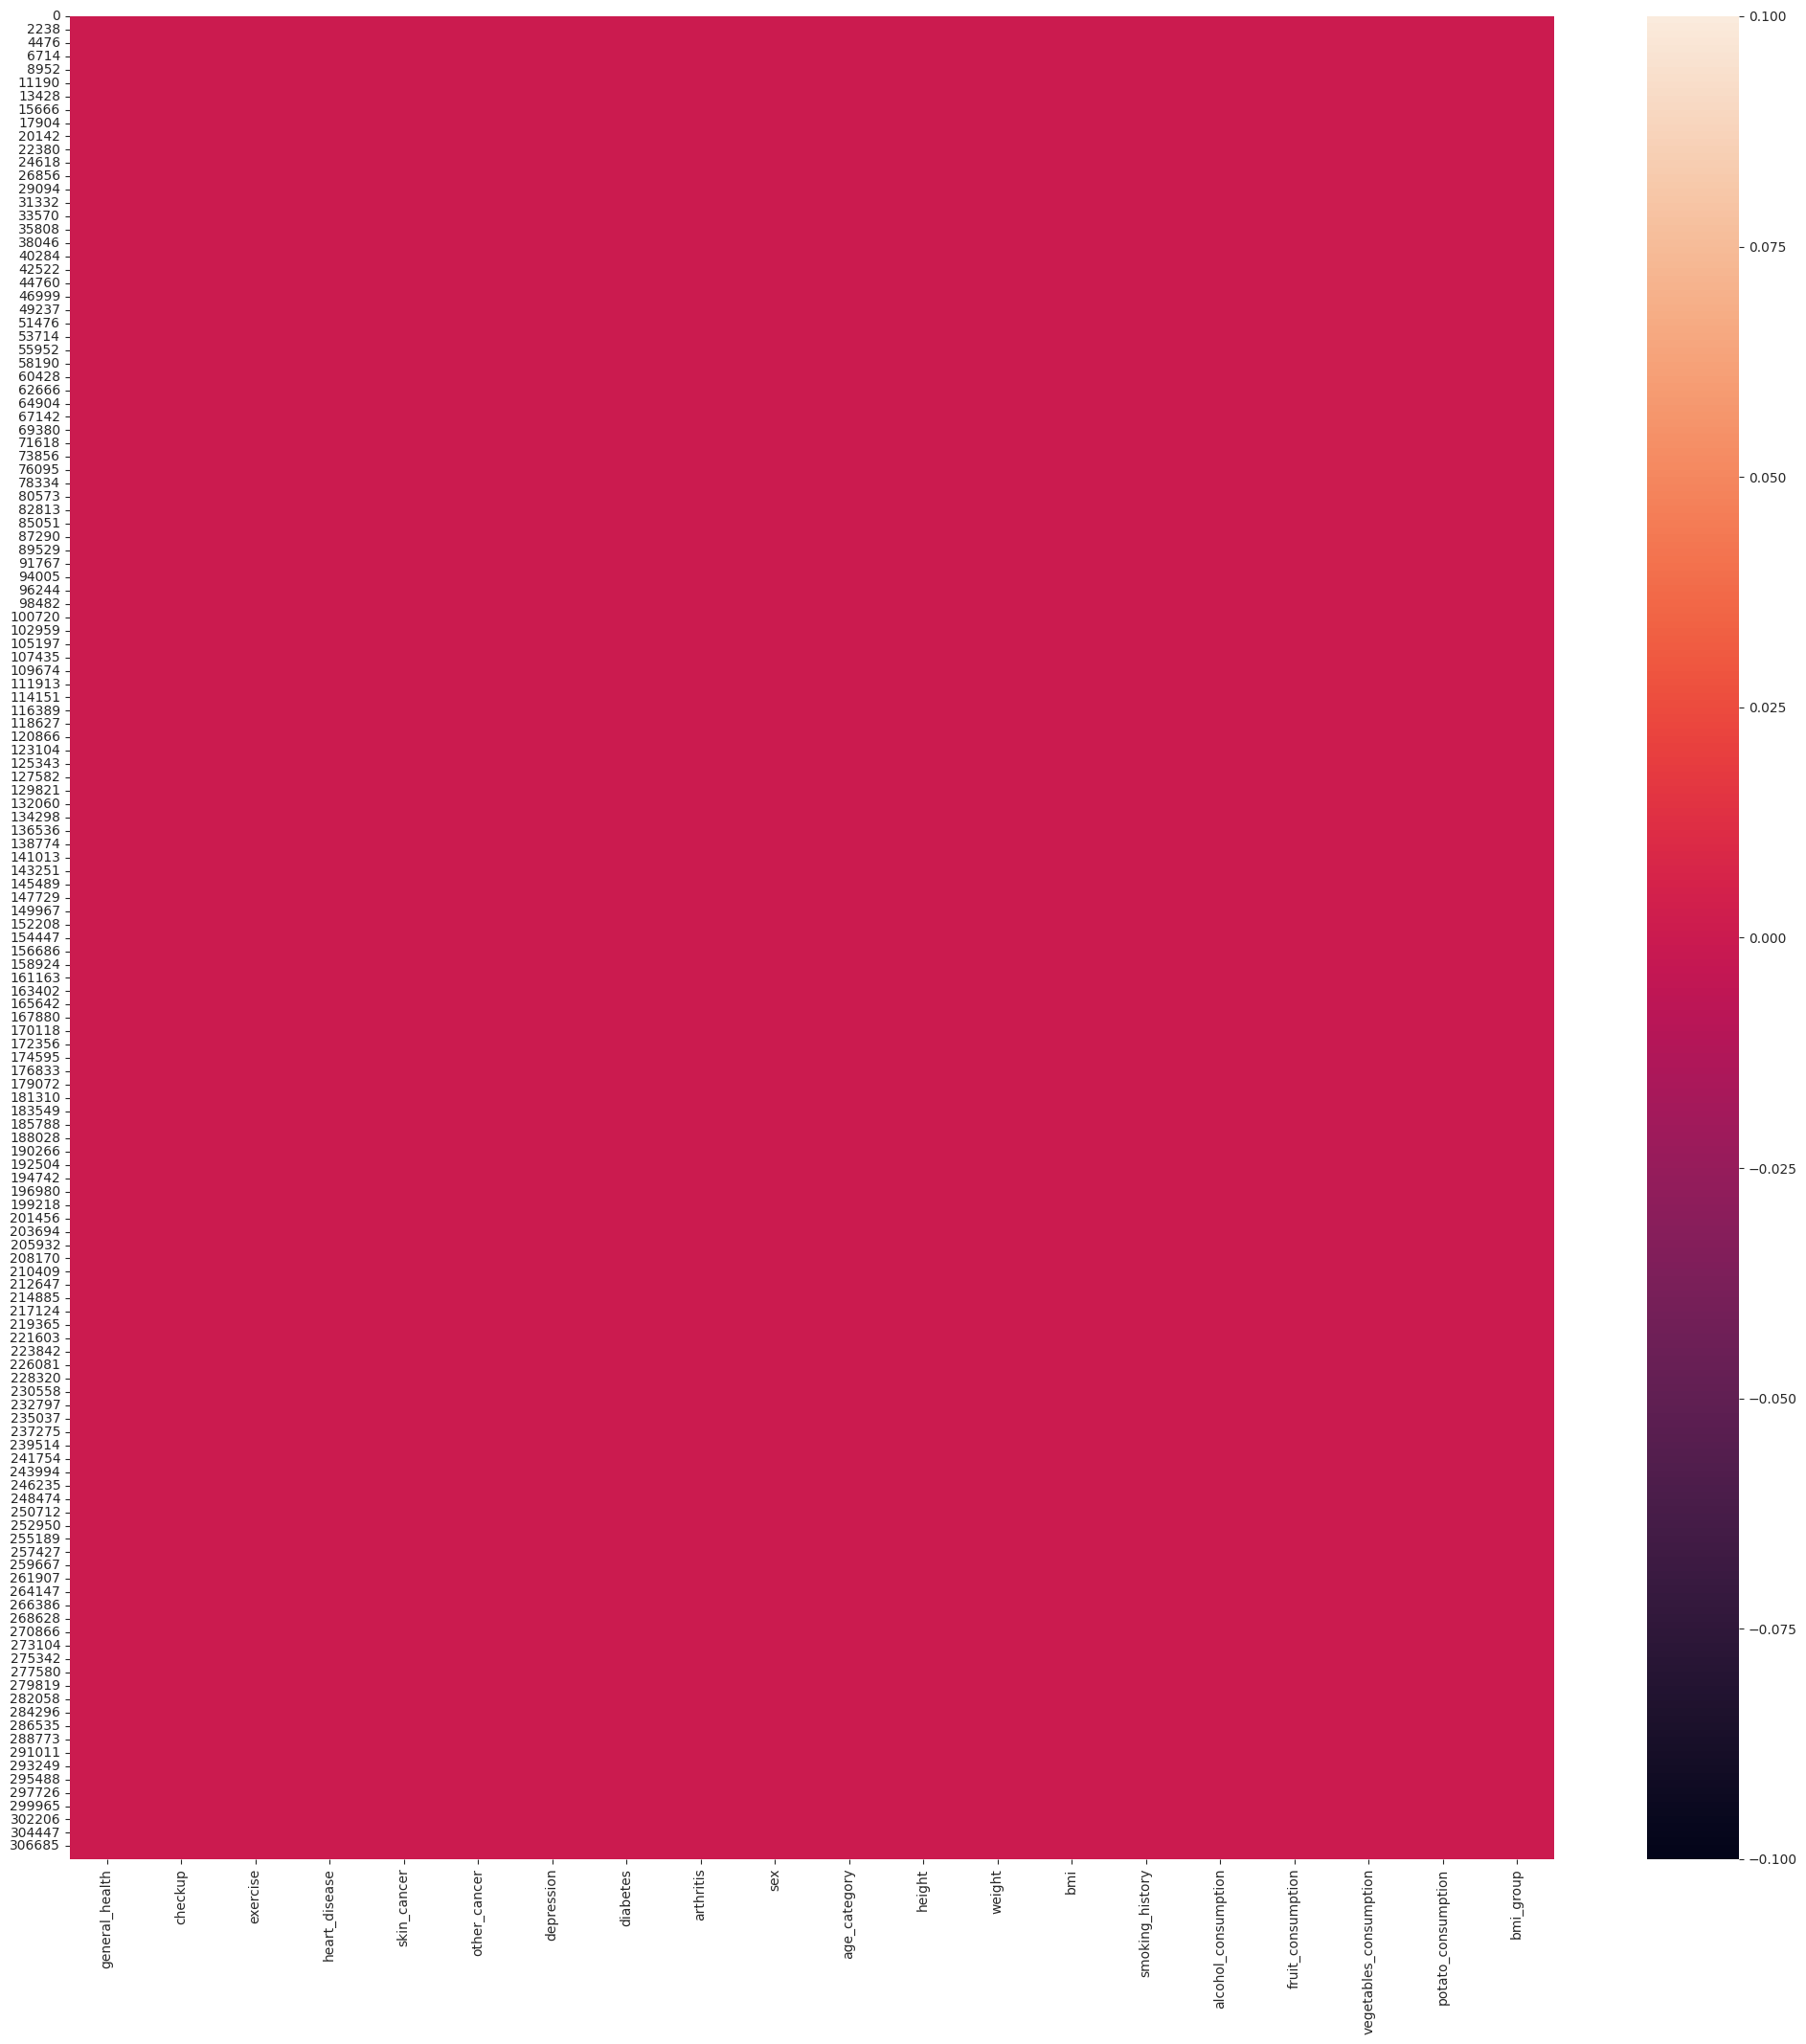

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

#PreProcessing

##Duplicate data remove

In [ ]:
# Count duplicates
duplicate_count = df.duplicated().sum()

# Print the count
print("Number of duplicates:", duplicate_count)

Number of duplicates: 80


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

In [ ]:
# Convering the column names into lower case and replacing the space with an underscore

df.columns = df.columns.str.lower().str.replace(" ", "_")

#Changing the name of a big column

df.rename(columns = {'height_(cm)' : 'height', 'weight_(kg)' : 'weight', 'green_vegetables_consumption' : 'vegetables_consumption', 'friedpotato_consumption' : 'potato_consumption'}, inplace = True)

In [ ]:
df.nunique()

general_health               5
checkup                      5
exercise                     2
heart_disease                2
skin_cancer                  2
other_cancer                 2
depression                   2
diabetes                     4
arthritis                    2
sex                          2
age_category                13
height                      99
weight                     525
bmi                       3654
smoking_history              2
alcohol_consumption         31
fruit_consumption           77
vegetables_consumption      75
potato_consumption          69
dtype: int64

In [ ]:
for col in df.select_dtypes(include = "object"):
    print(f"Column name: {col}")
    print(df[col].unique())
    print('\n', '-'*110, '\n')

Column name: general_health
['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']

 -------------------------------------------------------------------------------------------------------------- 

Column name: checkup
['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']

 -------------------------------------------------------------------------------------------------------------- 

Column name: exercise
['No' 'Yes']

 -------------------------------------------------------------------------------------------------------------- 

Column name: heart_disease
['No' 'Yes']

 -------------------------------------------------------------------------------------------------------------- 

Column name: skin_cancer
['No' 'Yes']

 -------------------------------------------------------------------------------------------------------------- 

Column name: other_cancer
['No' 'Yes']

 -------------------------------------------------------------------

##Data Visualization

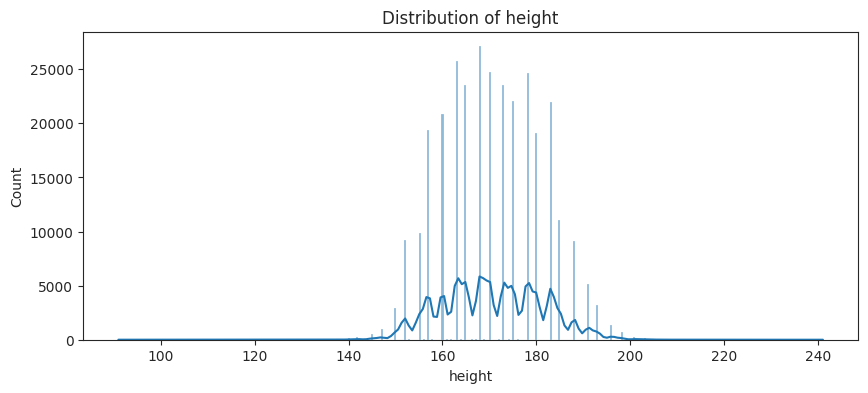

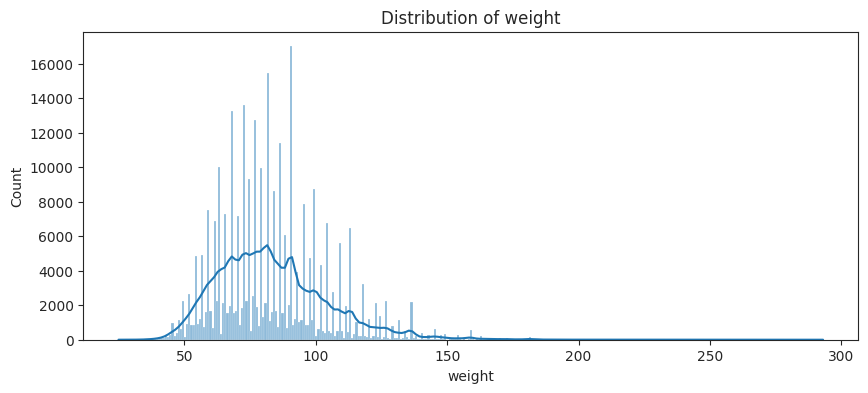

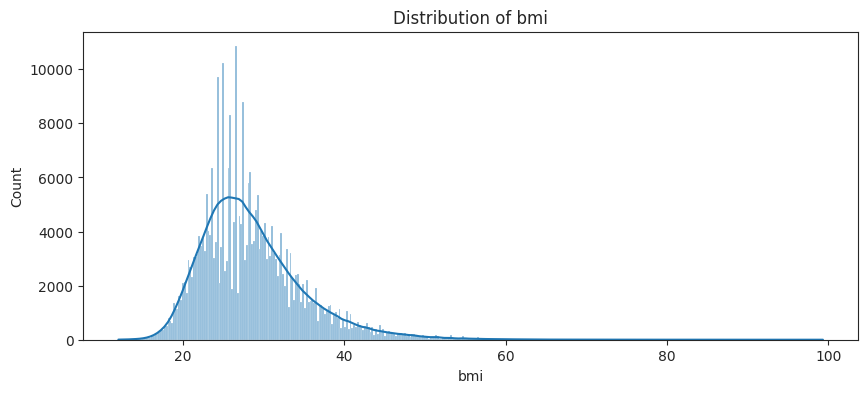

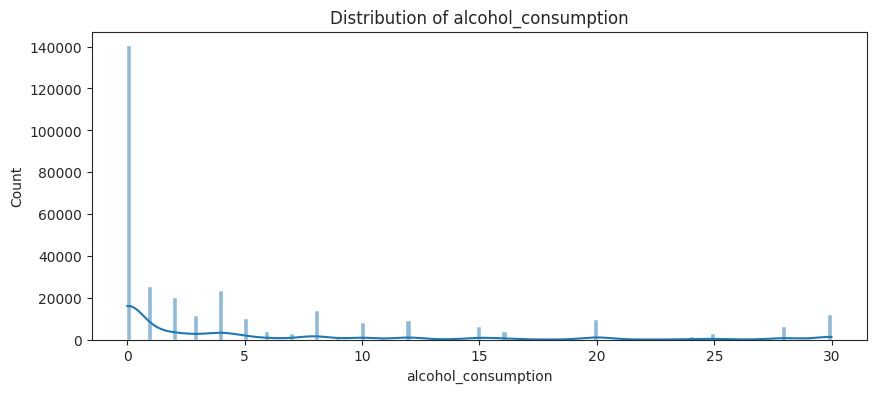

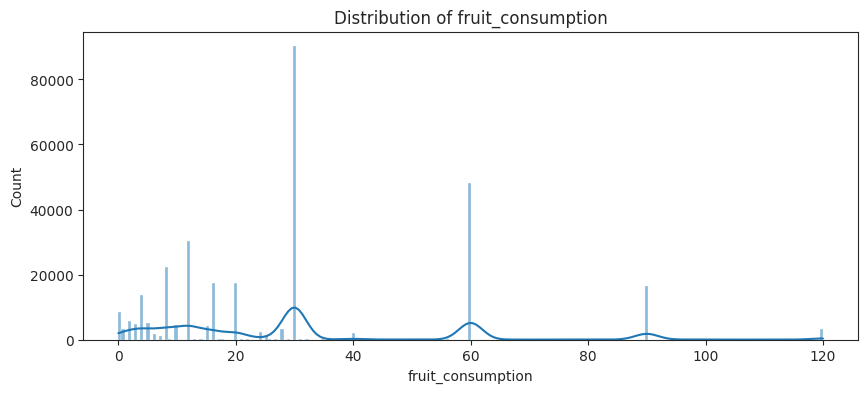

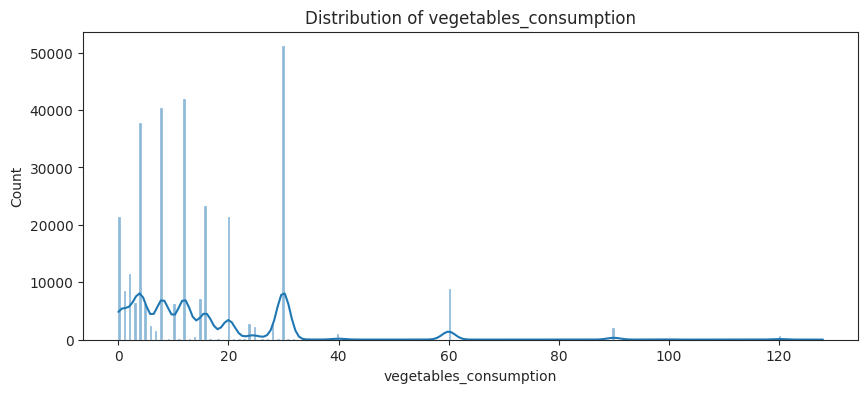

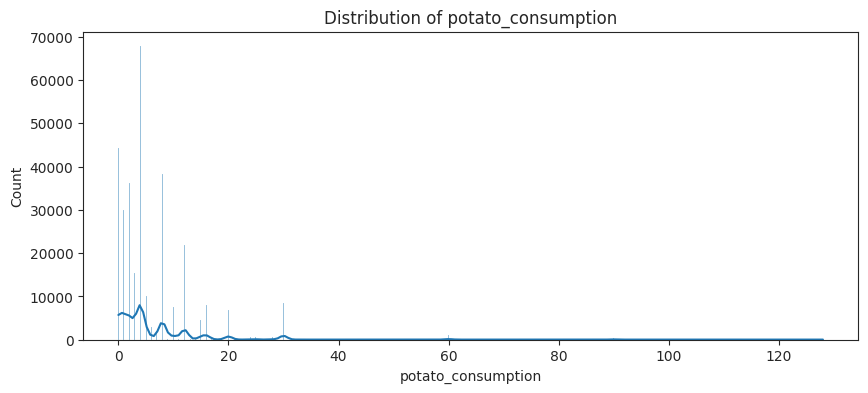

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['height', 'weight', 'bmi', 'alcohol_consumption', 'fruit_consumption', 'vegetables_consumption', 'potato_consumption']

for feature in numerical_features:
  plt.figure(figsize=(10, 4))
  sns.histplot(data=df, x=feature, kde=True)
  plt.title('Distribution of ' + feature)
  plt.show()


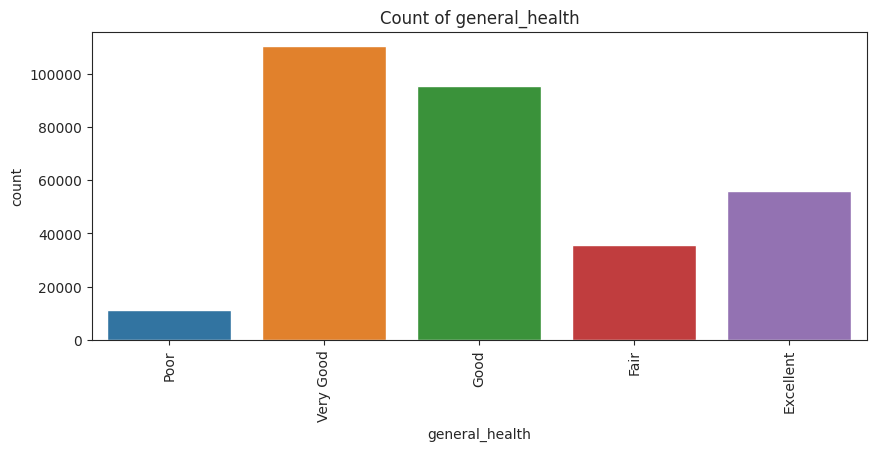

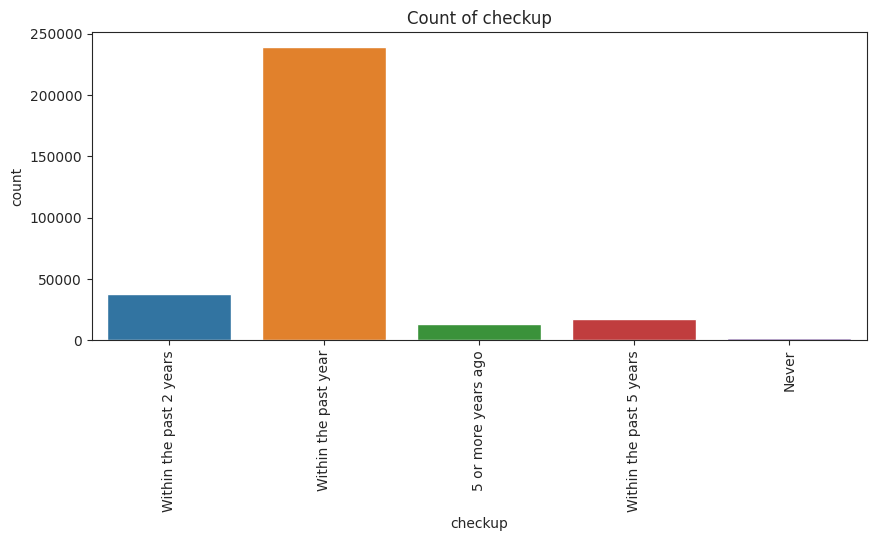

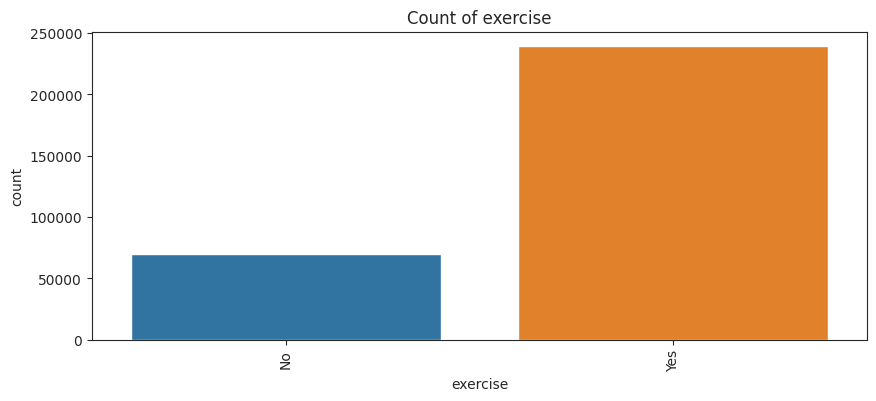

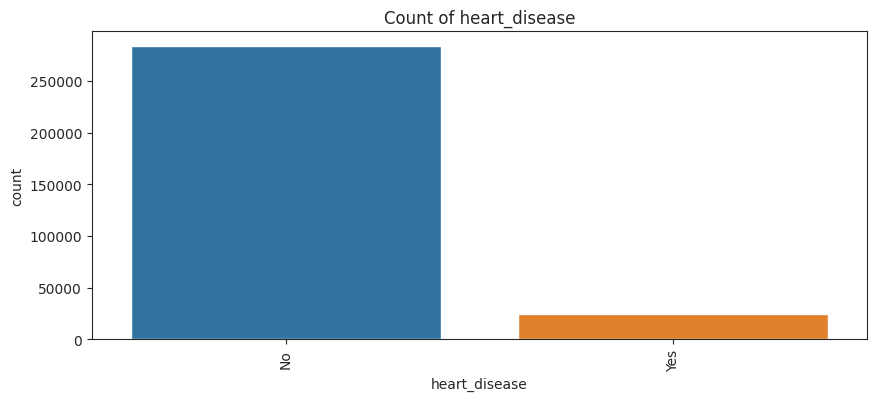

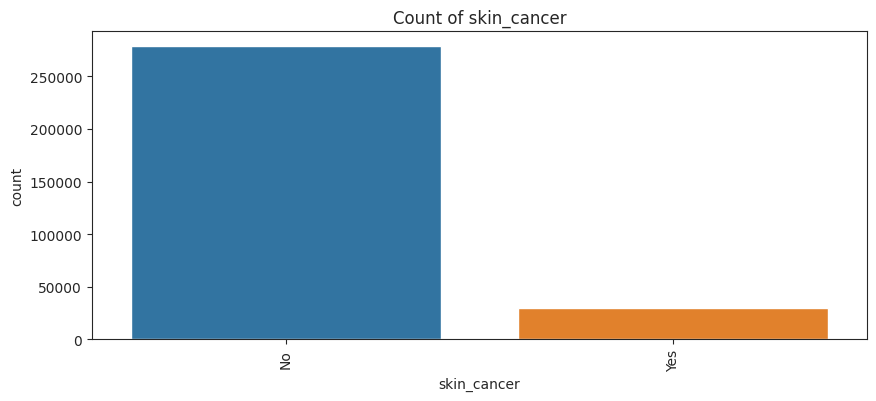

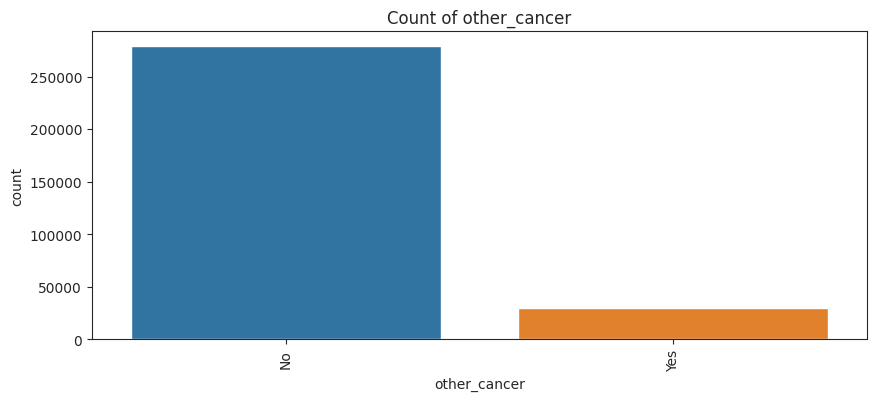

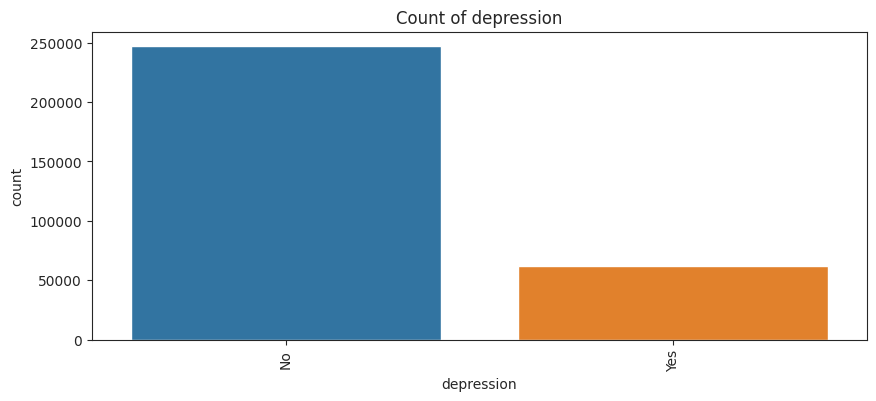

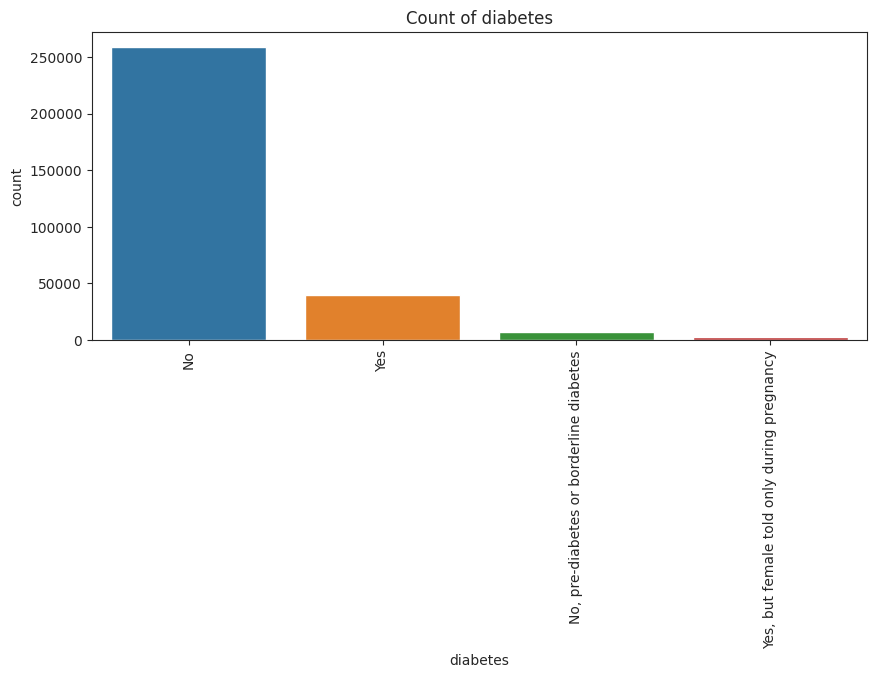

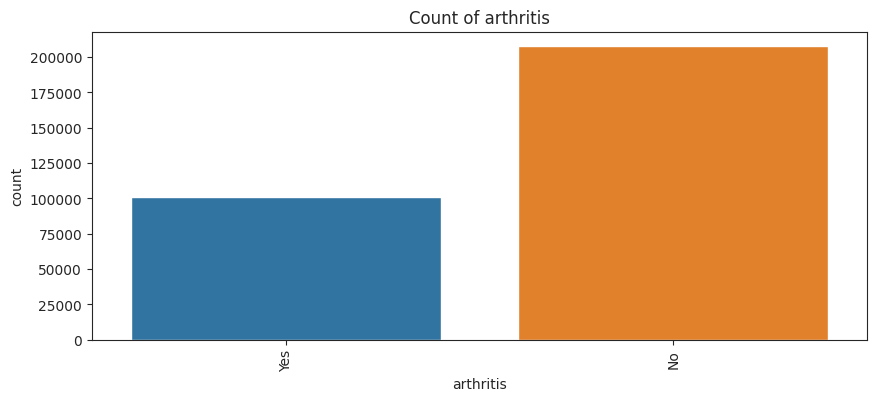

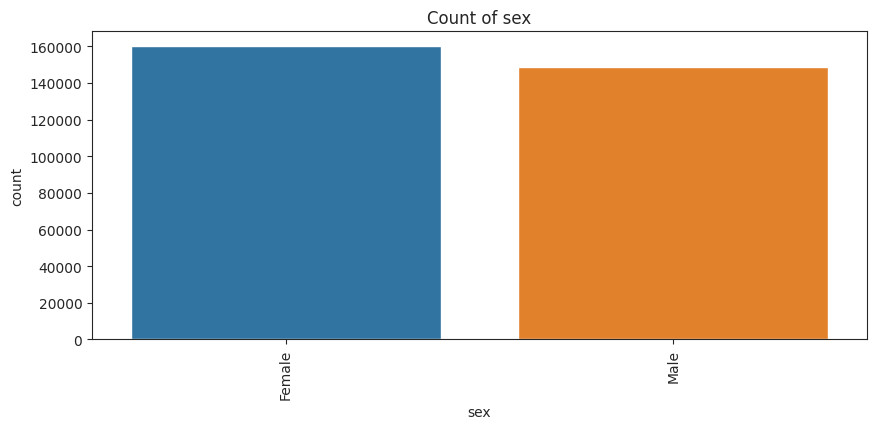

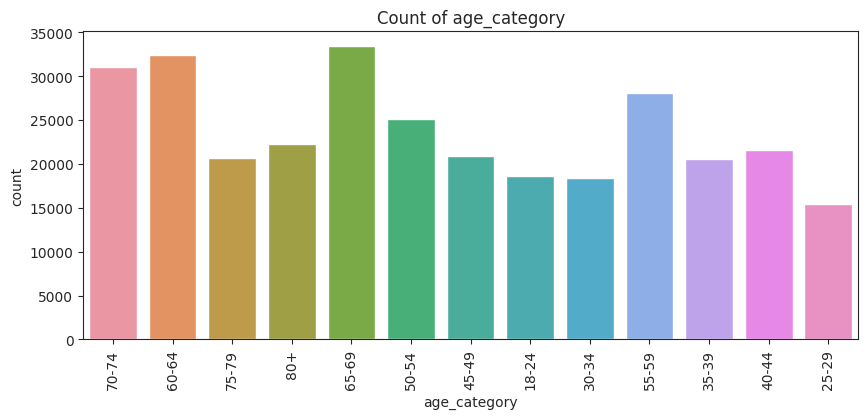

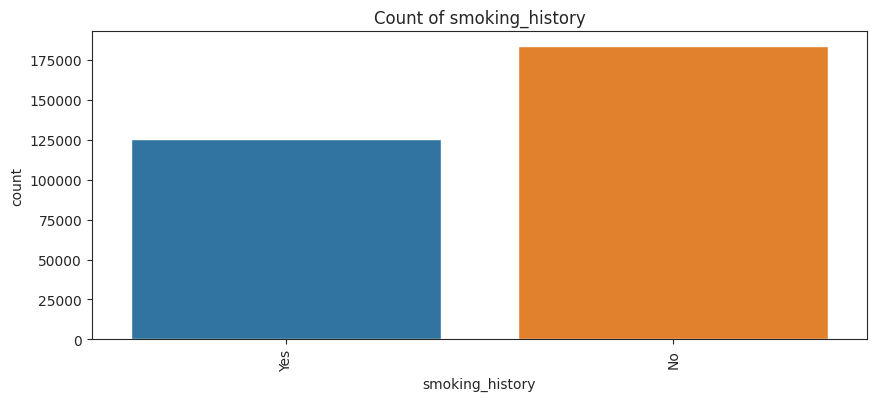

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of categorical features
categorical_features = ['general_health', 'checkup', 'exercise', 'heart_disease', 'skin_cancer', 'other_cancer', 'depression', 'diabetes', 'arthritis', 'sex', 'age_category', 'smoking_history']

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=feature)
    plt.title('Count of ' + feature)
    plt.xticks(rotation=90)
    plt.show()

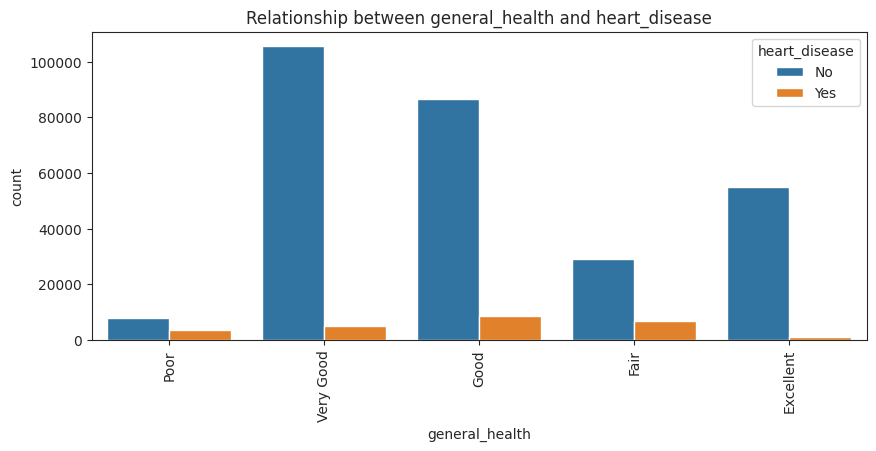

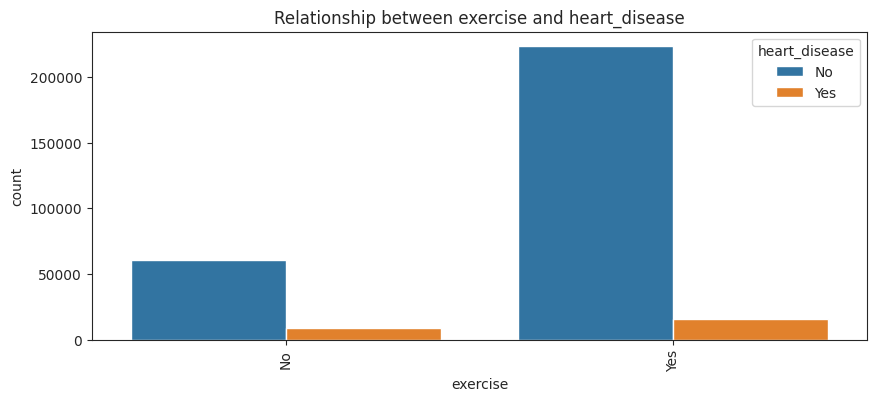

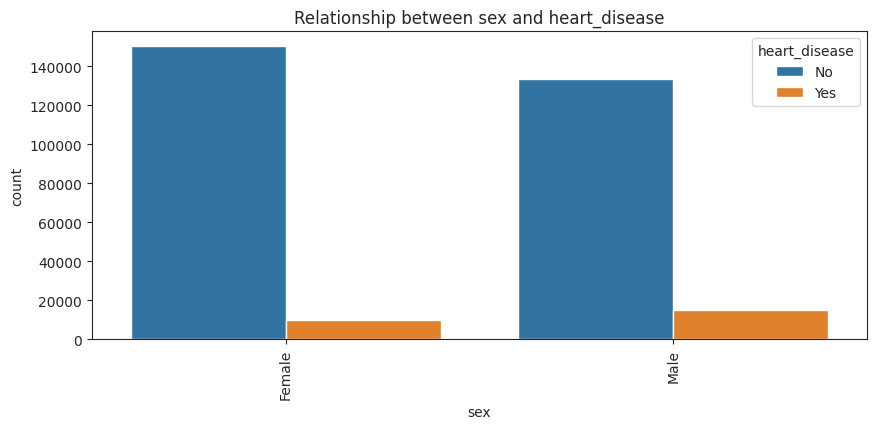

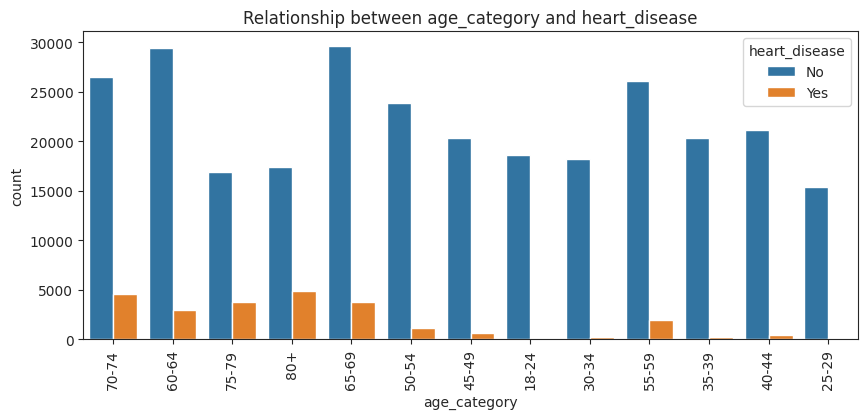

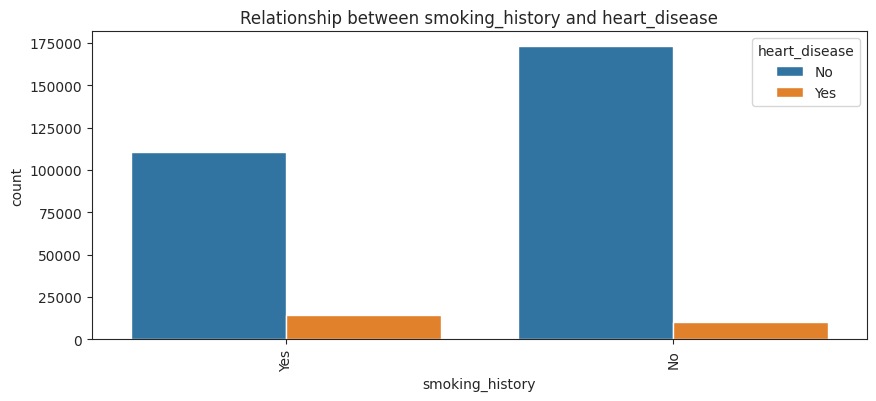

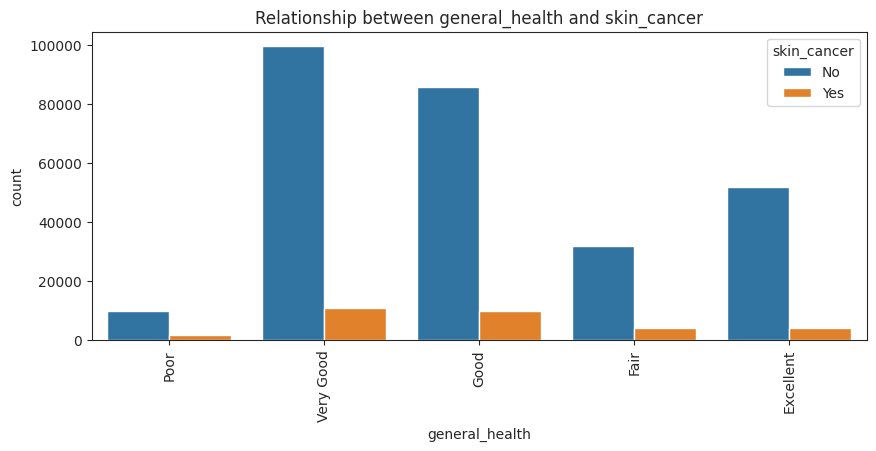

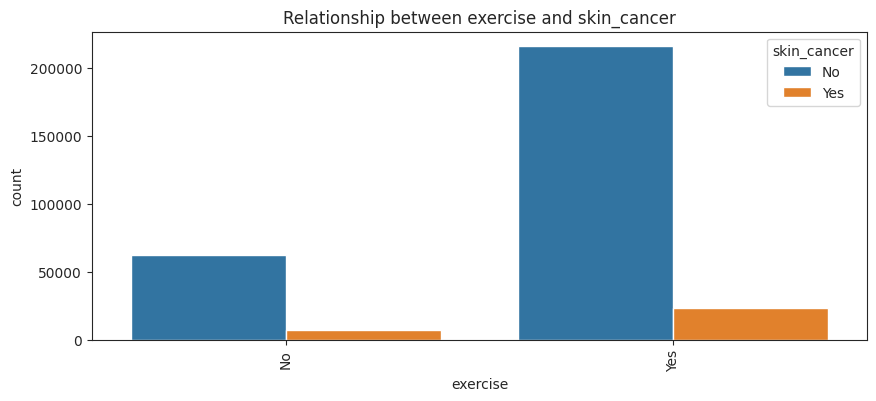

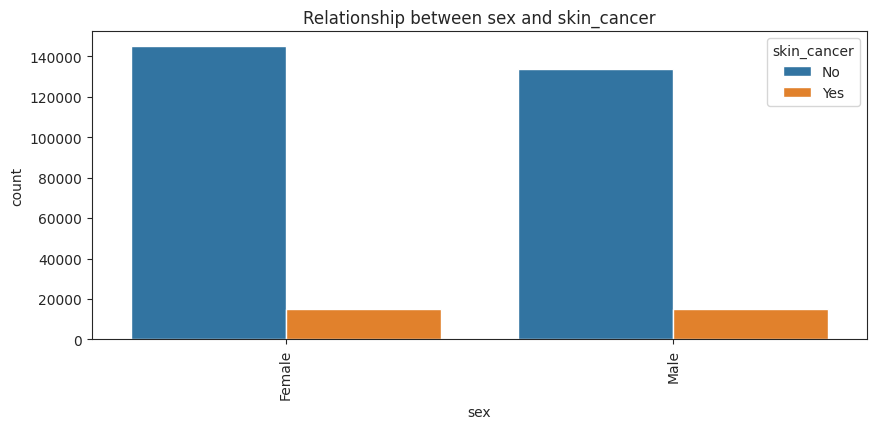

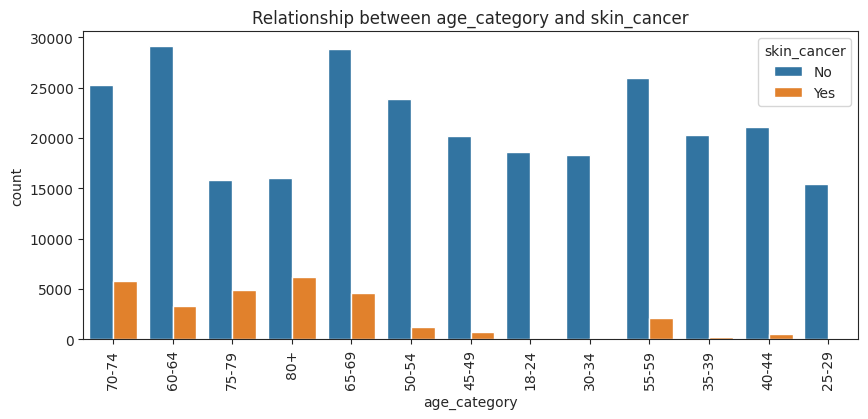

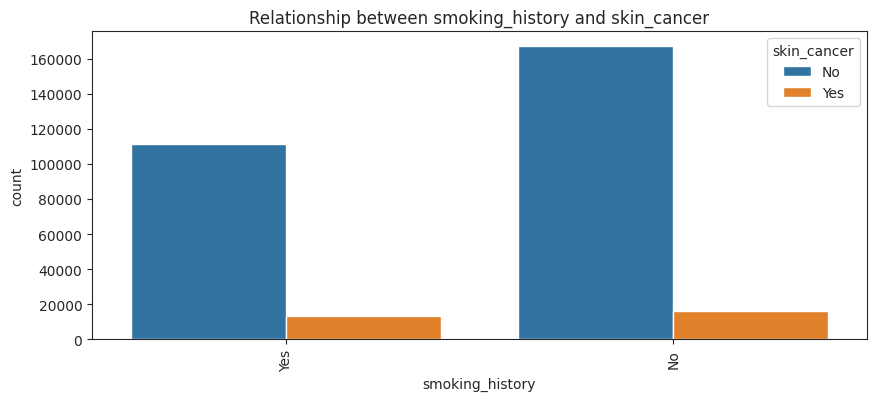

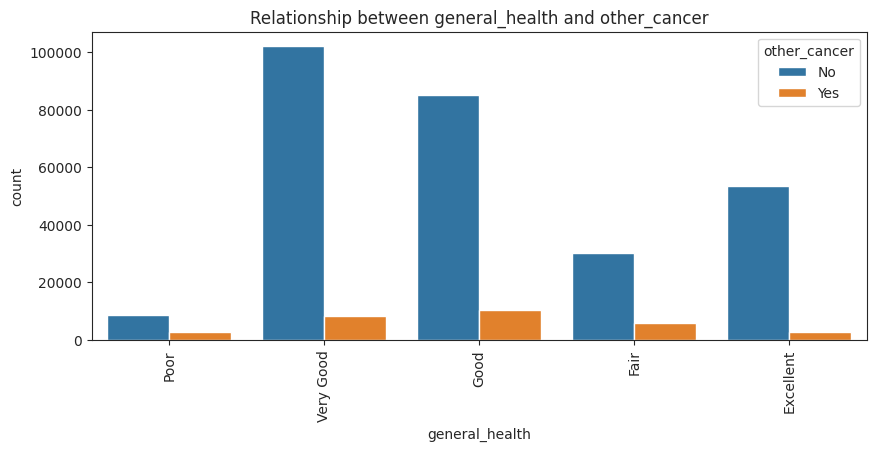

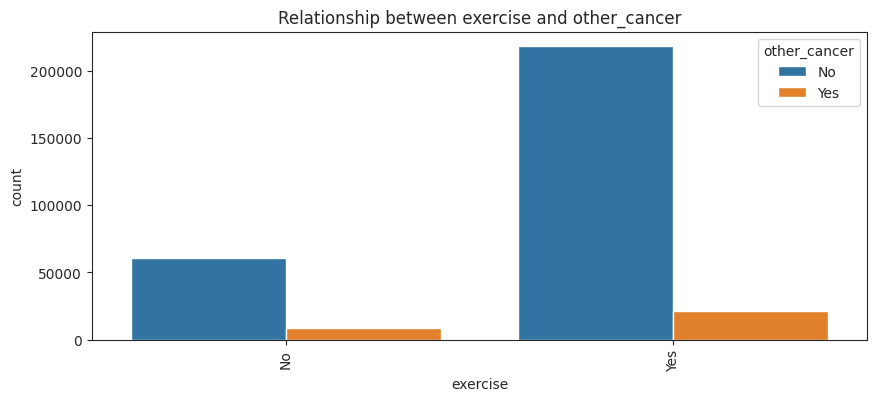

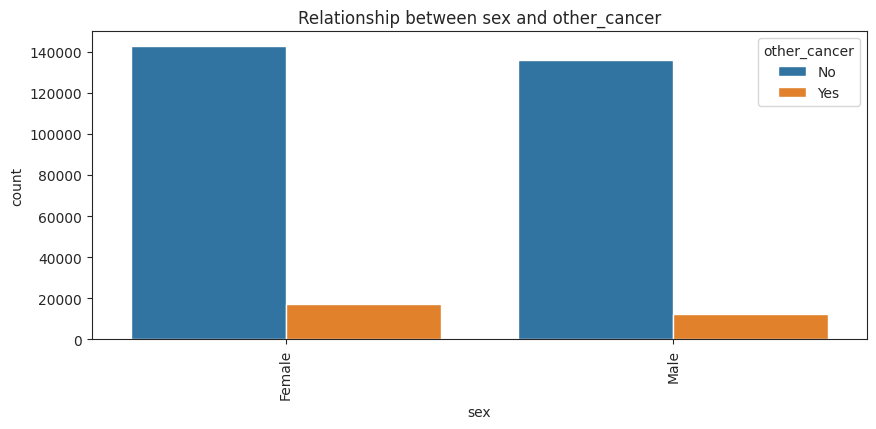

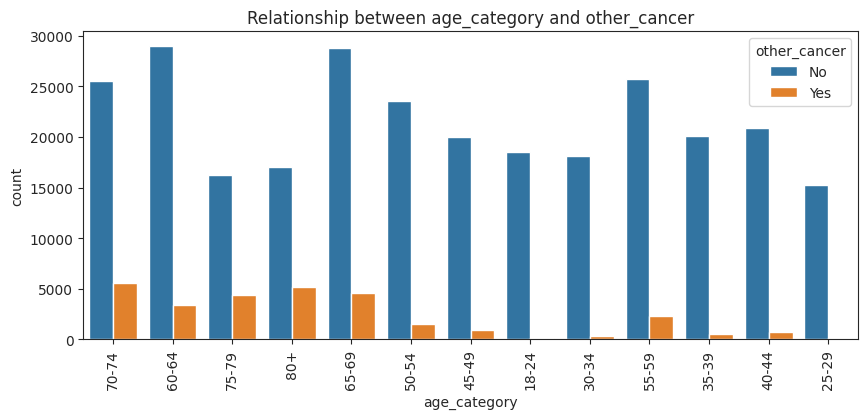

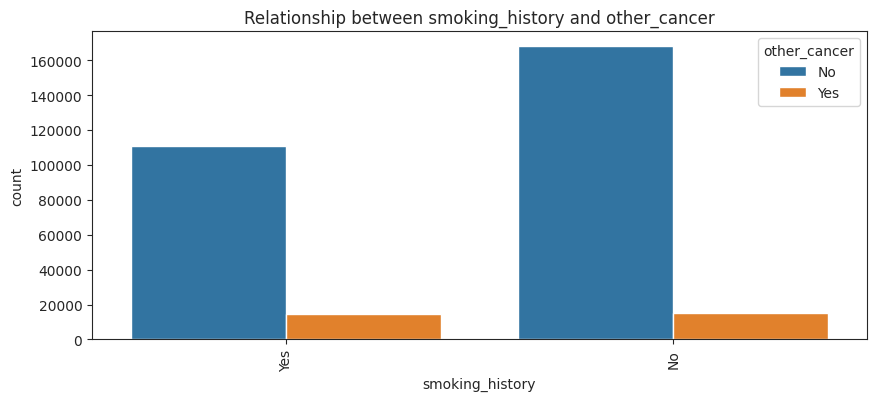

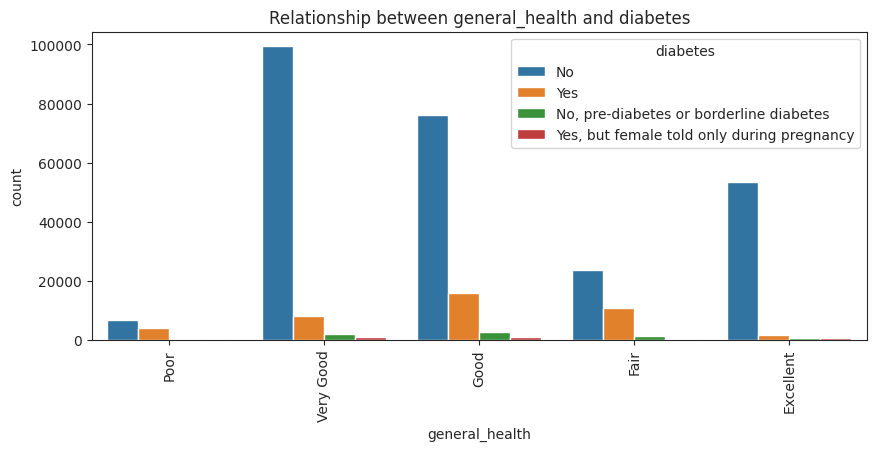

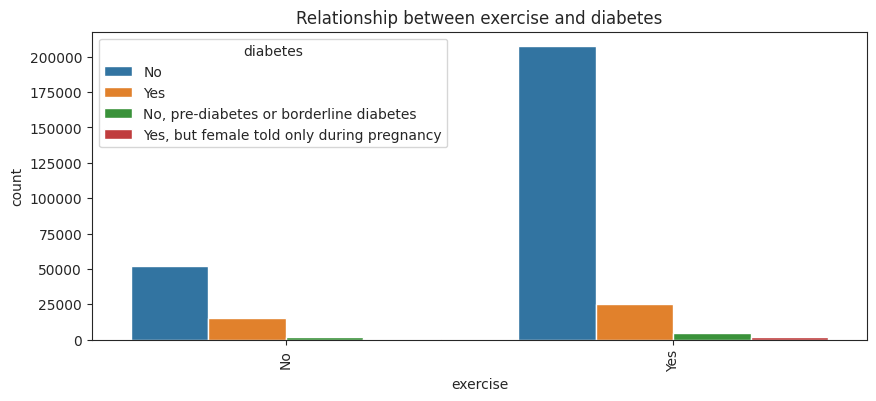

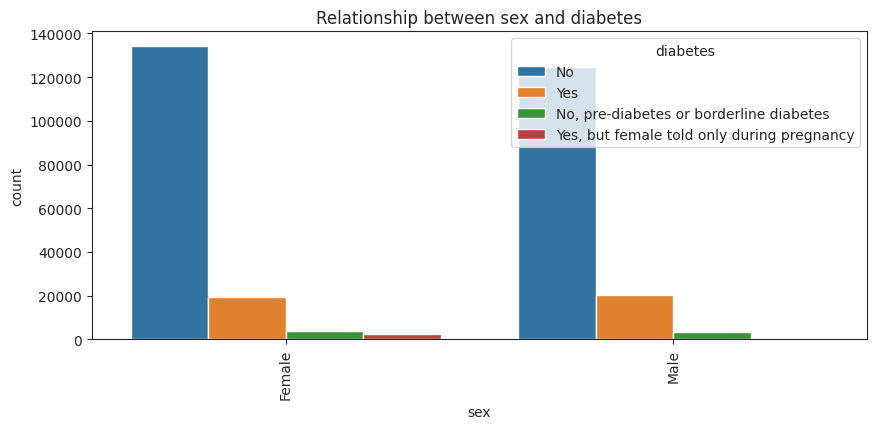

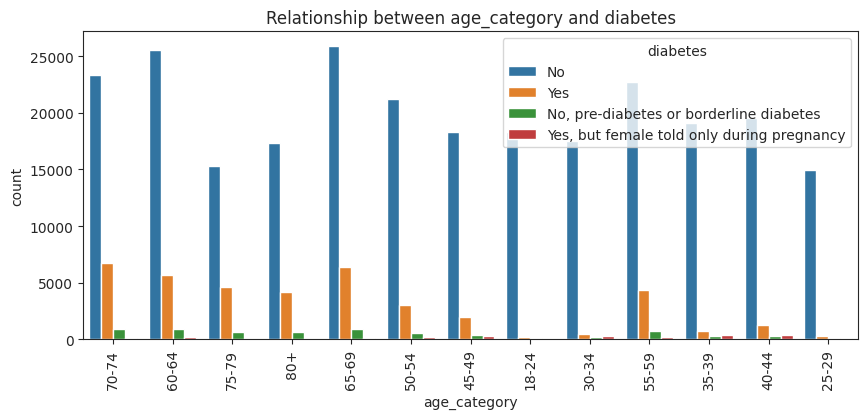

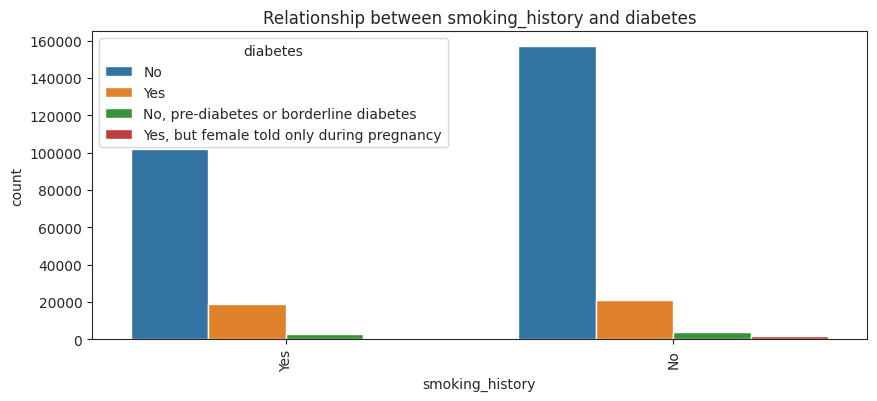

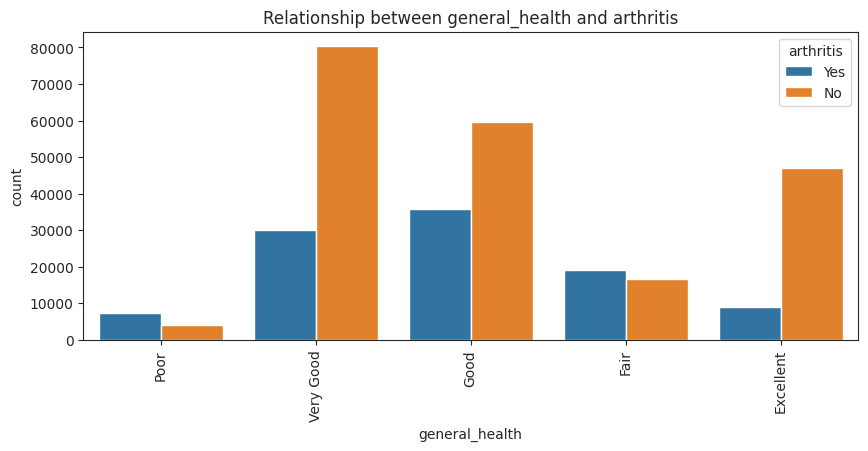

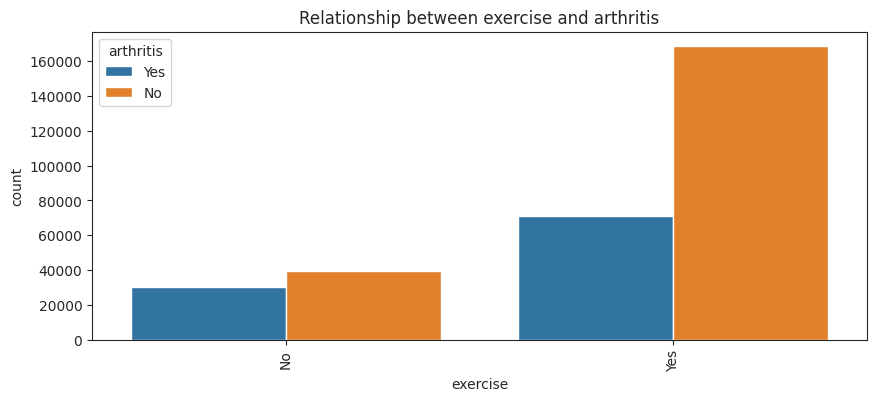

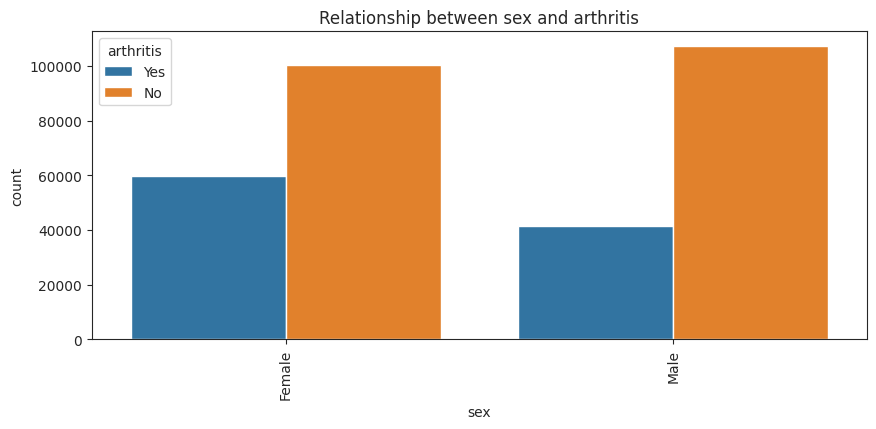

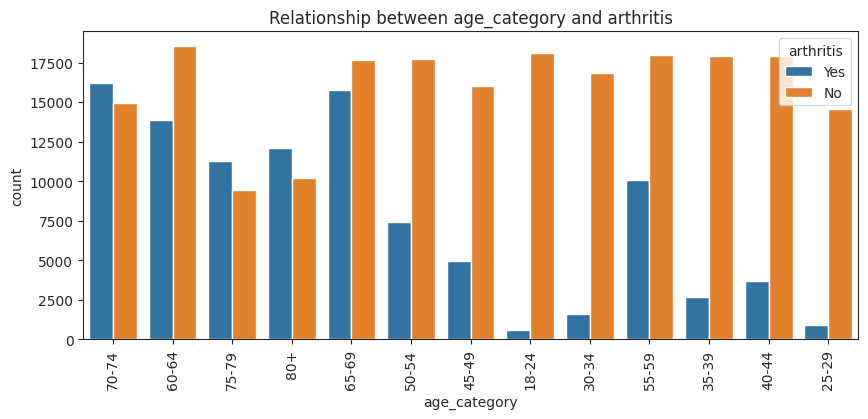

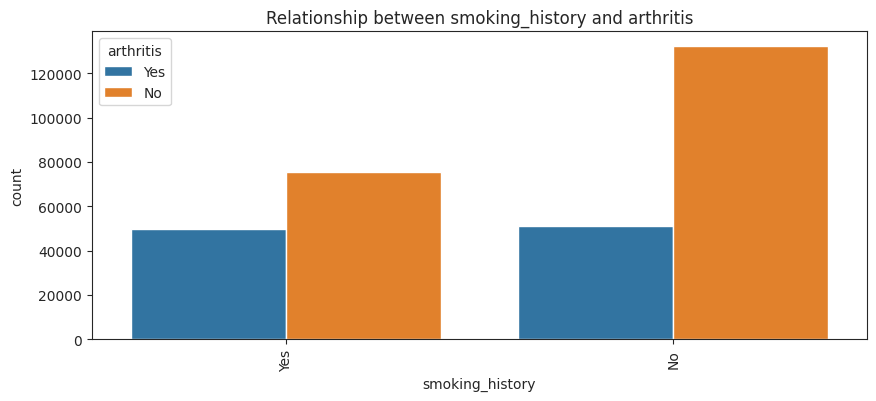

In [ ]:
# Bivariate Analysis
# Analyze the relationship between the disease conditions and some selected variables

selected_variables = ['general_health', 'exercise', 'sex', 'age_category', 'smoking_history']

disease_conditions = ['heart_disease', 'skin_cancer', 'other_cancer', 'diabetes', 'arthritis']

for disease in disease_conditions:
    for variable in selected_variables:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df, x=variable, hue=disease)
        plt.title('Relationship between ' + variable + ' and ' + disease)
        plt.xticks(rotation=90)
        plt.show()

In [ ]:
df

,general_health,checkup,exercise,heart_disease,skin_cancer,other_cancer,depression,diabetes,arthritis,sex,age_category,height,weight,bmi,smoking_history,alcohol_consumption,fruit_consumption,vegetables_consumption,potato_consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


###Range value Handling with Mid-point

In [ ]:
# data = df['age_category']
# df2= pd.DataFrame(data)

# # Define a custom function to calculate the midpoint of a range
# def calculate_midpoint(range_str):
#     if '+' in range_str:
#         lower_bound = int(range_str.split('+')[0])
#         midpoint = lower_bound + 5  # You can adjust this value based on your preference
#     else:
#         lower_bound, upper_bound = map(int, range_str.split('-'))
#         midpoint = (lower_bound + upper_bound) / 2
#     return midpoint

# # Apply the custom function to the "Age_Category" column to calculate midpoints
# df['age_Category'] = df2['age_Category'].apply(calculate_midpoint)

# # Display the DataFrame with midpoints
# print(df)

In [ ]:
df

,general_health,checkup,exercise,heart_disease,skin_cancer,other_cancer,depression,diabetes,arthritis,sex,age_category,height,weight,bmi,smoking_history,alcohol_consumption,fruit_consumption,vegetables_consumption,potato_consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


##Feature Construction

In [ ]:
bmi_bins = [12.02, 18.3, 26.85, 31.58, 37.8, 100]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese I', 'Obese II']
df['bmi_group'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
height,308774.0,170.615220,10.658452,91.00,163.00,170.00,178.00,241.00
weight,308774.0,83.590399,21.344664,24.95,68.04,81.65,95.25,293.02
bmi,308774.0,28.626813,6.522810,12.02,24.21,27.44,31.85,99.33
alcohol_consumption,308774.0,5.097557,8.200434,0.00,0.00,1.00,6.00,30.00
fruit_consumption,308774.0,29.834290,24.877812,0.00,12.00,30.00,30.00,120.00
vegetables_consumption,308774.0,15.109517,14.926912,0.00,4.00,12.00,20.00,128.00
potato_consumption,308774.0,6.297237,8.583837,0.00,2.00,4.00,8.00,128.00


##Encoding


###LabelEncoder

In [ ]:
categorical_columns = ['general_health', 'checkup', 'exercise', 'skin_cancer', 'other_cancer', 'depression', 'diabetes', 'arthritis', 'age_category', 'bmi_group']
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df

,general_health,checkup,exercise,heart_disease,skin_cancer,other_cancer,depression,diabetes,arthritis,sex,age_category,height,weight,bmi,smoking_history,alcohol_consumption,fruit_consumption,vegetables_consumption,potato_consumption,bmi_group
0,3,2,0,No,0,0,0,0,1,Female,10,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0,4
1,4,4,0,Yes,0,0,0,2,0,Female,10,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0,3
2,4,4,1,No,0,0,0,2,0,Female,8,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0,1
3,3,4,1,Yes,0,0,0,2,0,Male,11,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0,3
4,2,4,0,No,0,0,0,0,0,Male,12,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,4,1,No,0,0,0,0,0,Male,1,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0,3
308850,1,3,1,No,0,0,0,2,0,Male,9,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0,0
308851,4,0,1,No,0,0,1,3,0,Female,2,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0,0
308852,4,4,1,No,0,0,0,0,0,Male,9,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0,0


###OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse= False, handle_unknown='error', drop='first')

In [ ]:
df['heart_disease'] = df['heart_disease'].map({'Yes':1, 'No':0}) #map

df['sex']= ohe.fit_transform(df[['sex']])
df['smoking_history']= ohe.fit_transform(df[['smoking_history']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


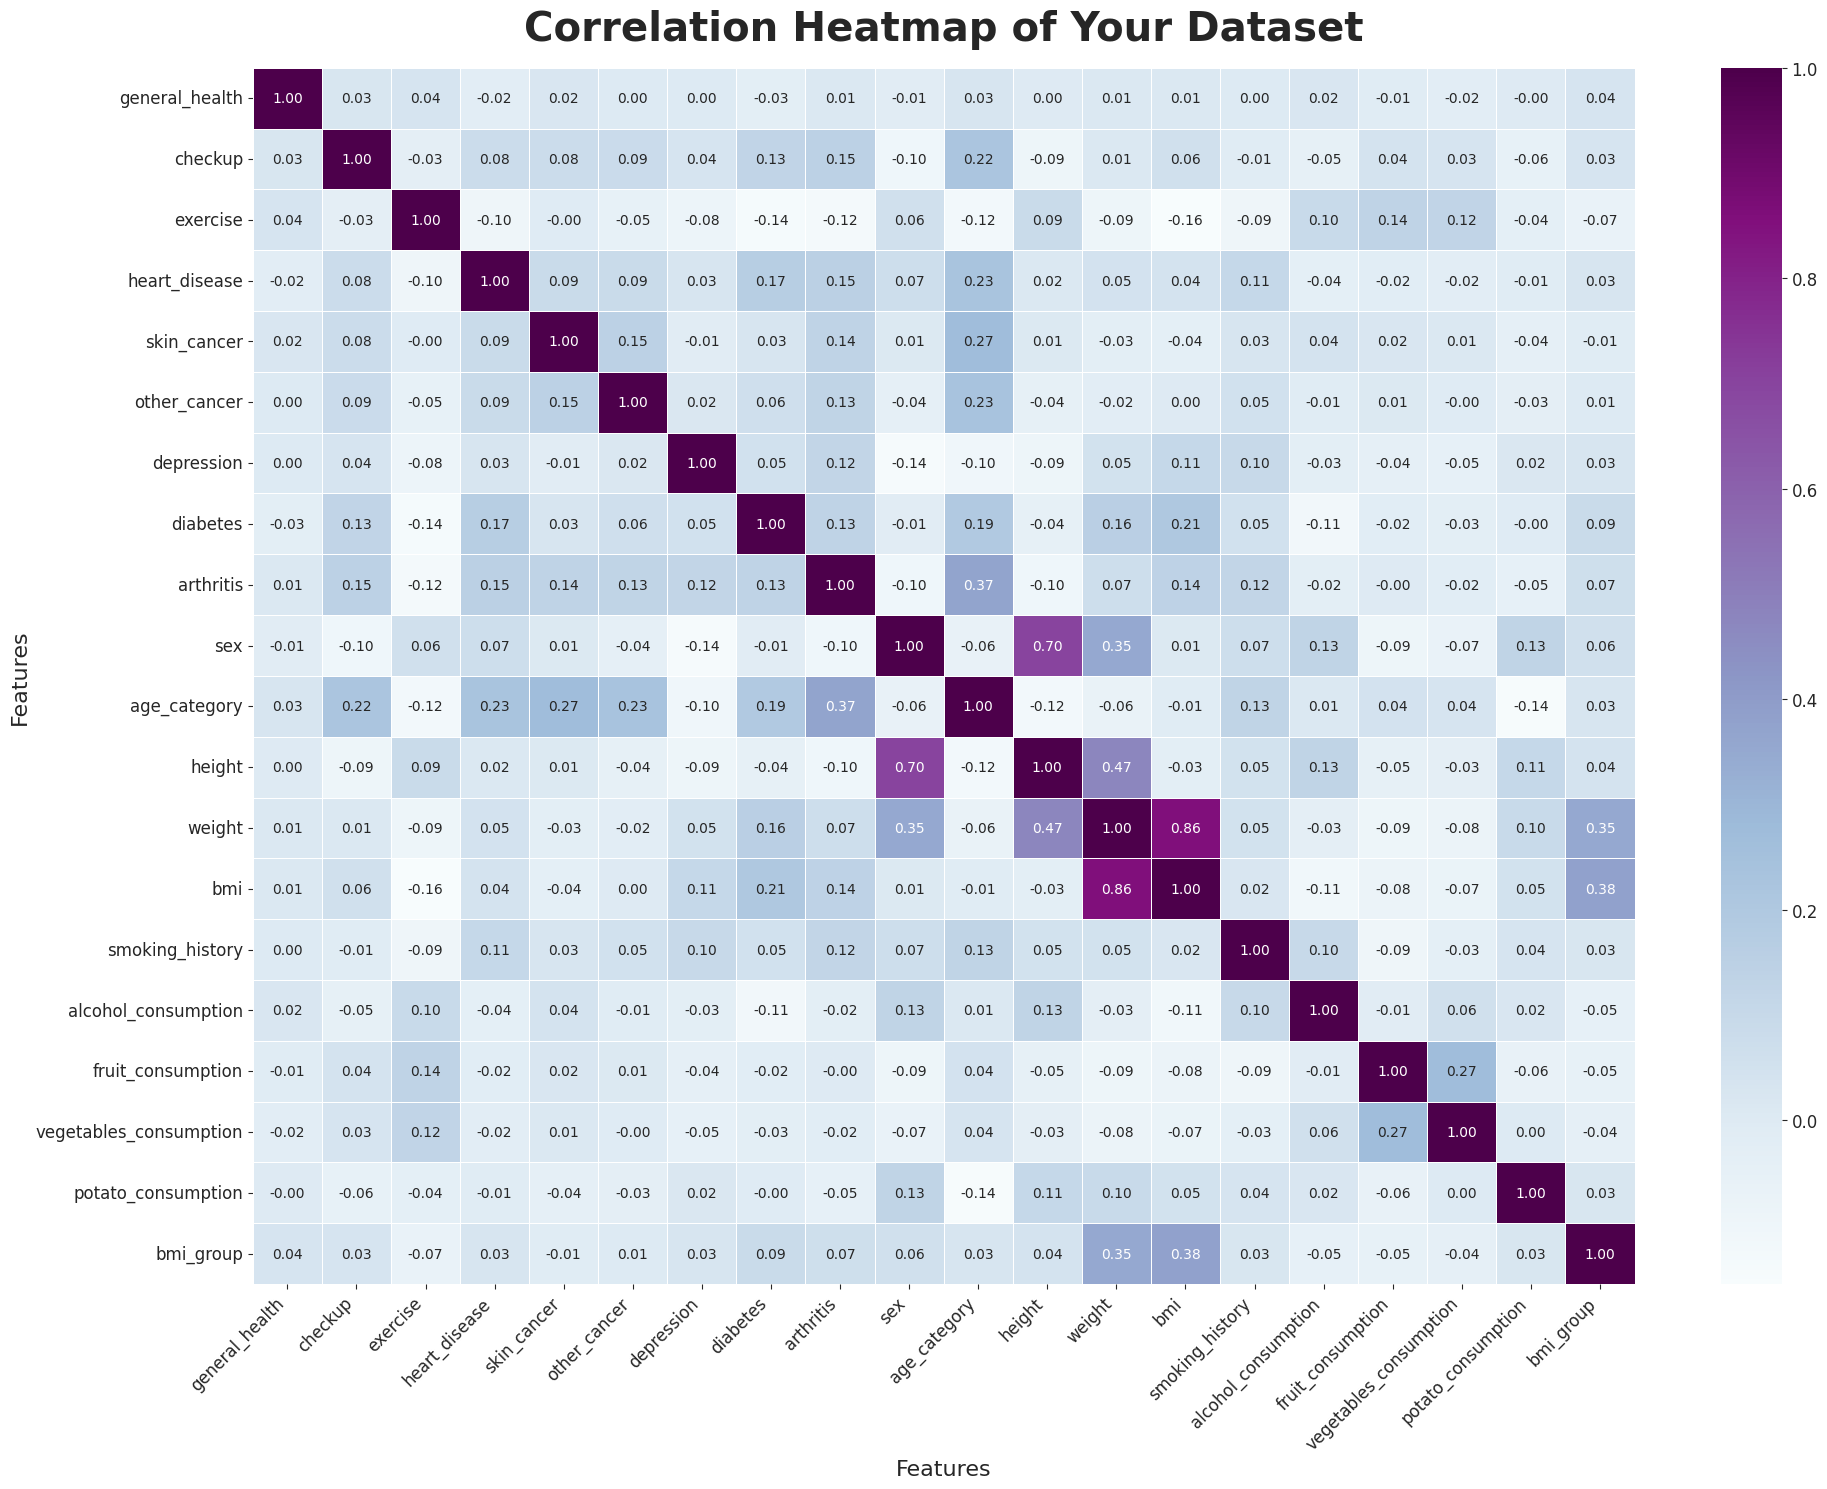

In [ ]:
plt.figure(figsize=(20, 15))

# Create the heatmap with seaborn
heatmap = sns.heatmap(df.corr(), annot=True, cmap='BuPu', fmt=".2f", linewidths=0.5)

# Customize the aesthetics
plt.title('Correlation Heatmap of Your Dataset', fontsize=29, pad=20, fontweight='bold')
plt.xlabel('Features', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()

##Data balancing

In [ ]:
# Checking the class Imbalance

df['heart_disease'].value_counts()

0    283803
1     24971
Name: heart_disease, dtype: int64

In [ ]:
X = df.drop("heart_disease", axis = 1)      # xX
y = df['heart_disease']            #yY

In [ ]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

##Train_test_split

In [ ]:
# Splitting the data into training and testing sets for diabetes balanced

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

##Feature Extraction(StandardScaler)

In [ ]:
# Feature Scaling on diabetes dataset

scaler_d = StandardScaler()
X_train_scaled = scaler_d.fit_transform(X_train)
X_test_scaled = scaler_d.transform(X_test)

In [ ]:
# Create the models

lr_d = LogisticRegression()
rf_d = RandomForestClassifier()
nb_d = GaussianNB()
dt_d = DecisionTreeClassifier()
#pc_d = PCA(n_components=2)
kn_d = KNeighborsClassifier()

# Fit the models

lr_d.fit(X_train_scaled, y_train)
rf_d.fit(X_train_scaled, y_train)
nb_d.fit(X_train_scaled, y_train)
dt_d.fit(X_train_scaled, y_train)
#pc_d.fit(X_train_scaled, y_train)
kn_d.fit(X_train_scaled, y_train)

# Make predictions

lr_pred_d = lr_d.predict(X_test_scaled)
rf_pred_d = rf_d.predict(X_test_scaled)
nb_pred_d = nb_d.predict(X_test_scaled)
dt_pred_d = dt_d.predict(X_test_scaled)
# pc_pred_d = pc_d.predict(X_test_scaled)
kn_pred_d = kn_d.predict(X_test_scaled)

In [ ]:
def plot_classification_report(report, title):
    lines = report.split('\n')[2:-5]
    classes = []
    precision = []
    recall = []
    f1_score = []
    support = []
    for line in lines:
        row_data = line.split()
        classes.append(row_data[0])
        precision.append(float(row_data[1]))
        recall.append(float(row_data[2]))
        f1_score.append(float(row_data[3]))
        support.append(int(row_data[4]))

    purple_colors = ['#A569BD', '#7D3C98', '#532865']
    fig = go.Figure()
    fig.add_trace(go.Bar(x=classes, y=precision, name='Precision', marker_color=purple_colors[0]))
    fig.add_trace(go.Bar(x=classes, y=recall, name='Recall', marker_color=purple_colors[1]))
    fig.add_trace(go.Bar(x=classes, y=f1_score, name='F1-Score', marker_color=purple_colors[2]))

    fig.update_layout(title=title, xaxis_title='Class', yaxis_title='Score', barmode='group', xaxis={'categoryorder': 'total descending'})

    fig.show()

In [ ]:
# Classification reports for different algorithms

lr_d_report = classification_report(y_test, lr_pred_d)

rf_d_report = classification_report(y_test, rf_pred_d)

nb_d_report = classification_report(y_test, nb_pred_d)

dt_d_report = classification_report(y_test, dt_pred_d)

#pc_d_report = classification_report(y_test, pc_pred_d)

kn_d_report = classification_report(y_test, kn_pred_d)

In [ ]:
# # Plot classification reports

# print("="*45, "Logistic regression report:", "="*50, '\n')
# print(lr_d_report)
# plot_classification_report(lr_d_report, "Logistic Regression Classification Report Visualization")


# print("="*50, "Random forest report:", "="*50, '\n')
# print(rf_d_report)
# plot_classification_report(rf_d_report, "Random Forest Classification Report")


# print("="*50, "Gaussian NB:", "="*50, '\n')
# print(nb_d_report)
# plot_classification_report(nb_d_report, "GaussianNB Classification Report")

# print("="*50, "Decision Trees:", "="*50, '\n')
# print(dt_d_report)
# plot_classification_report(dt_d_report, "Decision Trees Classification Report")

# # print("="*50, ":", "="*50, '\n')
# # print(pc_d_report)
# # plot_classification_report(pc_d_report, "PCA Classification Report")

# print("="*50, "Gaussian NB:", "="*50, '\n')
# print(kn_d_report)
# plot_classification_report(kn_d_report, "KNN Classification Report")

In [ ]:
# # Calculate ROC and AUC for each model

# lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred_d)
# lr_auc = auc(lr_fpr, lr_tpr)

# rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred_d)
# rf_auc = auc(rf_fpr, rf_tpr)


# nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_pred_d)
# nb_auc = auc(nb_fpr, nb_tpr)


# dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_pred_d)
# dt_auc = auc(dt_fpr, dt_tpr)


# kn_fpr, kn_tpr, _ = roc_curve(y_test, kn_pred_d)
# kn_auc = auc(kn_fpr, kn_tpr)

# # Create ROC curve plot using Plotly

# fig = go.Figure()
# fig.add_trace(go.Scatter(x=lr_fpr, y=lr_tpr, mode='lines', name=f'Logistic Regression (AUC = {lr_auc:.2f})'))
# fig.add_trace(go.Scatter(x=rf_fpr, y=rf_tpr, mode='lines', name=f'Random Forest (AUC = {rf_auc:.2f})'))
# fig.add_trace(go.Scatter(x=nb_fpr, y=nb_tpr, mode='lines', name=f'GaussianNB (AUC = {nb_auc:.2f})'))
# fig.add_trace(go.Scatter(x=dt_fpr, y=dt_tpr, mode='lines', name=f'Decision Trees (AUC = {dt_auc:.2f})'))
# fig.add_trace(go.Scatter(x=kn_fpr, y=kn_tpr, mode='lines', name=f'KNN (AUC = {kn_auc:.2f})'))

# fig.add_shape(type='line', line=dict(dash='dash'), x0=0, x1=1, y0=0, y1=1)
# fig.update_layout(title='Receiver Operating Characteristic (ROC) Curve for Diabetes', xaxis=dict(title='False Positive Rate'), yaxis=dict(title='True Positive Rate'), legend=dict(x=0.7, y=0.2), autosize=False, width=900, height=500, plot_bgcolor='white')
# fig.show()

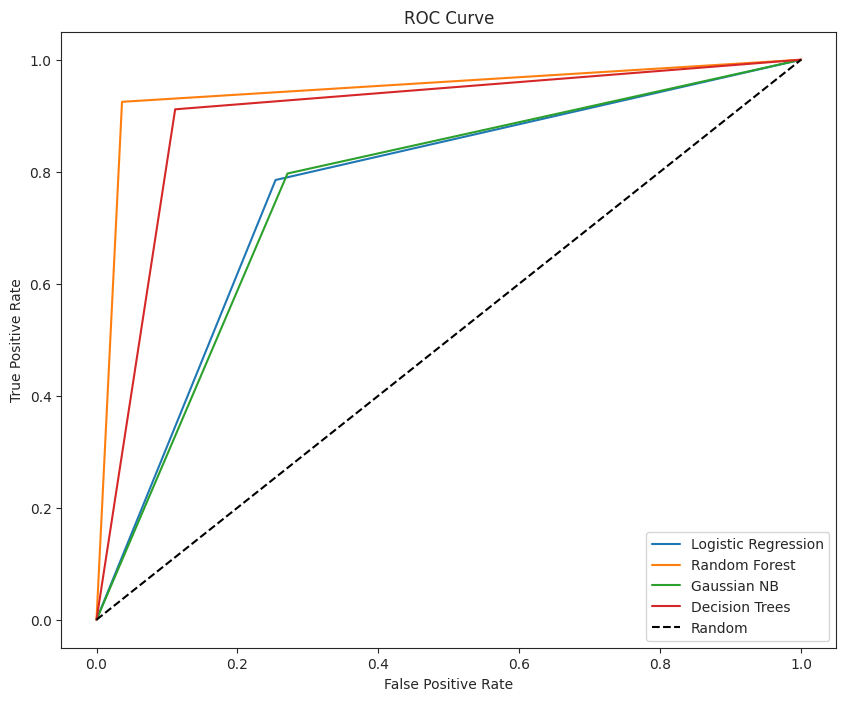

Logistic Regression Metrics:
Mean Squared Error: 0.23435985976286536
Root Mean Squared Error: 0.4841072812537169
Jaccard Score: 0.6273913895969301
ROC AUC Score: 0.7655396430000642
Cross-Validation Scores: [0.76747745 0.76132222 0.76703701 0.76542938 0.76427061]
Accuracy: 0.7656401402371347
Precision: 0.7573713396902685
Recall: 0.7852097246323465
F1-Score: 0.771039337687932
Random Forest Metrics:
Mean Squared Error: 0.05579535244269833
Root Mean Squared Error: 0.23621039867604968
Jaccard Score: 0.8928184648707188
ROC AUC Score: 0.9443041865960747
Cross-Validation Scores: [0.94114538 0.93868989 0.94168493 0.940771   0.93996653]
Accuracy: 0.9442046475573017
Precision: 0.9626872479792727
Recall: 0.9248216508036669
F1-Score: 0.9433746356988324
Gaussian NB Metrics:
Mean Squared Error: 0.23697609273973327
Root Mean Squared Error: 0.48680190297464254
Jaccard Score: 0.6282302866145214
ROC AUC Score: 0.7628502955030466
Cross-Validation Scores: [0.76266558 0.76047436 0.7624894  0.7613002  0.7613

In [ ]:
from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, jaccard_score
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming lr_d, rf_d, nb_d, dt_d, and kn_d are already defined and trained

# Make predictions on the scaled testing set
lr_pred = lr_d.predict(X_test_scaled)
rf_pred = rf_d.predict(X_test_scaled)
nb_pred = nb_d.predict(X_test_scaled)
dt_pred = dt_d.predict(X_test_scaled)
#kn_pred = kn_d.predict(X_test_scaled)

# Calculate mean squared error
mse_lr = mean_squared_error(y_test, lr_pred)
rmse_lr = np.sqrt(mse_lr)

mse_rf = mean_squared_error(y_test, rf_pred)
rmse_rf = np.sqrt(mse_rf)

mse_nb = mean_squared_error(y_test, nb_pred)
rmse_nb = np.sqrt(mse_nb)

mse_dt = mean_squared_error(y_test, dt_pred)
rmse_dt = np.sqrt(mse_dt)

# mse_kn = mean_squared_error(y_test, kn_pred)
# rmse_kn = np.sqrt(mse_kn)

# Calculate Jaccard Score
jaccard_lr = jaccard_score(y_test, lr_pred)
jaccard_rf = jaccard_score(y_test, rf_pred)
jaccard_nb = jaccard_score(y_test, nb_pred)
jaccard_dt = jaccard_score(y_test, dt_pred)
#jaccard_kn = jaccard_score(y_test, kn_pred)

# Calculate ROC AUC score
roc_auc_lr = roc_auc_score(y_test, lr_pred)
roc_auc_rf = roc_auc_score(y_test, rf_pred)
roc_auc_nb = roc_auc_score(y_test, nb_pred)
roc_auc_dt = roc_auc_score(y_test, dt_pred)
#roc_auc_kn = roc_auc_score(y_test, kn_pred)

# Plot ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred)
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_pred)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_pred)
#fpr_kn, tpr_kn, _ = roc_curve(y_test, kn_pred)

plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_nb, tpr_nb, label='Gaussian NB')
plt.plot(fpr_dt, tpr_dt, label='Decision Trees')
#plt.plot(fpr_kn, tpr_kn, label='KNN')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Cross-validation using LeaveOneOut
loo = LeaveOneOut()

scores_lr = cross_val_score(lr_d, X_train_scaled, y_train, cv=5)
scores_rf = cross_val_score(rf_d, X_train_scaled, y_train, cv=5)
scores_nb = cross_val_score(nb_d, X_train_scaled, y_train, cv=5)
scores_dt = cross_val_score(dt_d, X_train_scaled, y_train, cv=5)
#scores_kn = cross_val_score(kn_d, X_train_scaled, y_train, cv=5)

# Accuracy, Precision, Recall, F1-Score
accuracy_lr = accuracy_score(y_test, lr_pred)
precision_lr = precision_score(y_test, lr_pred)
recall_lr = recall_score(y_test, lr_pred)
f1_lr = f1_score(y_test, lr_pred)

accuracy_rf = accuracy_score(y_test, rf_pred)
precision_rf = precision_score(y_test, rf_pred)
recall_rf = recall_score(y_test, rf_pred)
f1_rf = f1_score(y_test, rf_pred)

accuracy_nb = accuracy_score(y_test, nb_pred)
precision_nb = precision_score(y_test, nb_pred)
recall_nb = recall_score(y_test, nb_pred)
f1_nb = f1_score(y_test, nb_pred)

accuracy_dt = accuracy_score(y_test, dt_pred)
precision_dt = precision_score(y_test, dt_pred)
recall_dt = recall_score(y_test, dt_pred)
f1_dt = f1_score(y_test, dt_pred)

# accuracy_kn = accuracy_score(y_test, kn_pred)
# precision_kn = precision_score(y_test, kn_pred)
# recall_kn = recall_score(y_test, kn_pred)
# f1_kn = f1_score(y_test, kn_pred)

# Print the results
print("Logistic Regression Metrics:")
print(f"Mean Squared Error: {mse_lr}")
print(f"Root Mean Squared Error: {rmse_lr}")
print(f"Jaccard Score: {jaccard_lr}")
print(f"ROC AUC Score: {roc_auc_lr}")
print(f"Cross-Validation Scores: {scores_lr}")
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1-Score: {f1_lr}")

# Repeat similar prints for other models...

# ... (Previous code remains unchanged)

# Repeat similar prints for other models

print("Random Forest Metrics:")
print(f"Mean Squared Error: {mse_rf}")
print(f"Root Mean Squared Error: {rmse_rf}")
print(f"Jaccard Score: {jaccard_rf}")
print(f"ROC AUC Score: {roc_auc_rf}")
print(f"Cross-Validation Scores: {scores_rf}")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-Score: {f1_rf}")

print("Gaussian NB Metrics:")
print(f"Mean Squared Error: {mse_nb}")
print(f"Root Mean Squared Error: {rmse_nb}")
print(f"Jaccard Score: {jaccard_nb}")
print(f"ROC AUC Score: {roc_auc_nb}")
print(f"Cross-Validation Scores: {scores_nb}")
print(f"Accuracy: {accuracy_nb}")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1-Score: {f1_nb}")

print("Decision Trees Metrics:")
print(f"Mean Squared Error: {mse_dt}")
print(f"Root Mean Squared Error: {rmse_dt}")
print(f"Jaccard Score: {jaccard_dt}")
print(f"ROC AUC Score: {roc_auc_dt}")
print(f"Cross-Validation Scores: {scores_dt}")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1-Score: {f1_dt}")

#---------------------------------------------------------------
# Omitted part for PCA, as it's commented out in your code
# print("PCA Metrics:")
# print(f"Mean Squared Error: {mse_pc}")
# print(f"Root Mean Squared Error: {rmse_pc}")
# print(f"Jaccard Score: {jaccard_pc}")
# print(f"ROC AUC Score: {roc_auc_pc}")
# print(f"Cross-Validation Scores: {scores_pc}")
# print(f"Accuracy: {accuracy_pc}")
# print(f"Precision: {precision_pc}")
# print(f"Recall: {recall_pc}")
# print(f"F1-Score: {f1_pc}")

# print("KNN Metrics:")
# print(f"Mean Squared Error: {mse_kn}")
# print(f"Root Mean Squared Error: {rmse_kn}")
# print(f"Jaccard Score: {jaccard_kn}")
# print(f"ROC AUC Score: {roc_auc_kn}")
# print(f"Cross-Validation Scores: {scores_kn}")
# print(f"Accuracy: {accuracy_kn}")
# print(f"Precision: {precision_kn}")
# print(f"Recall: {recall_kn}")
# print(f"F1-Score: {f1_kn}")



###Mapping

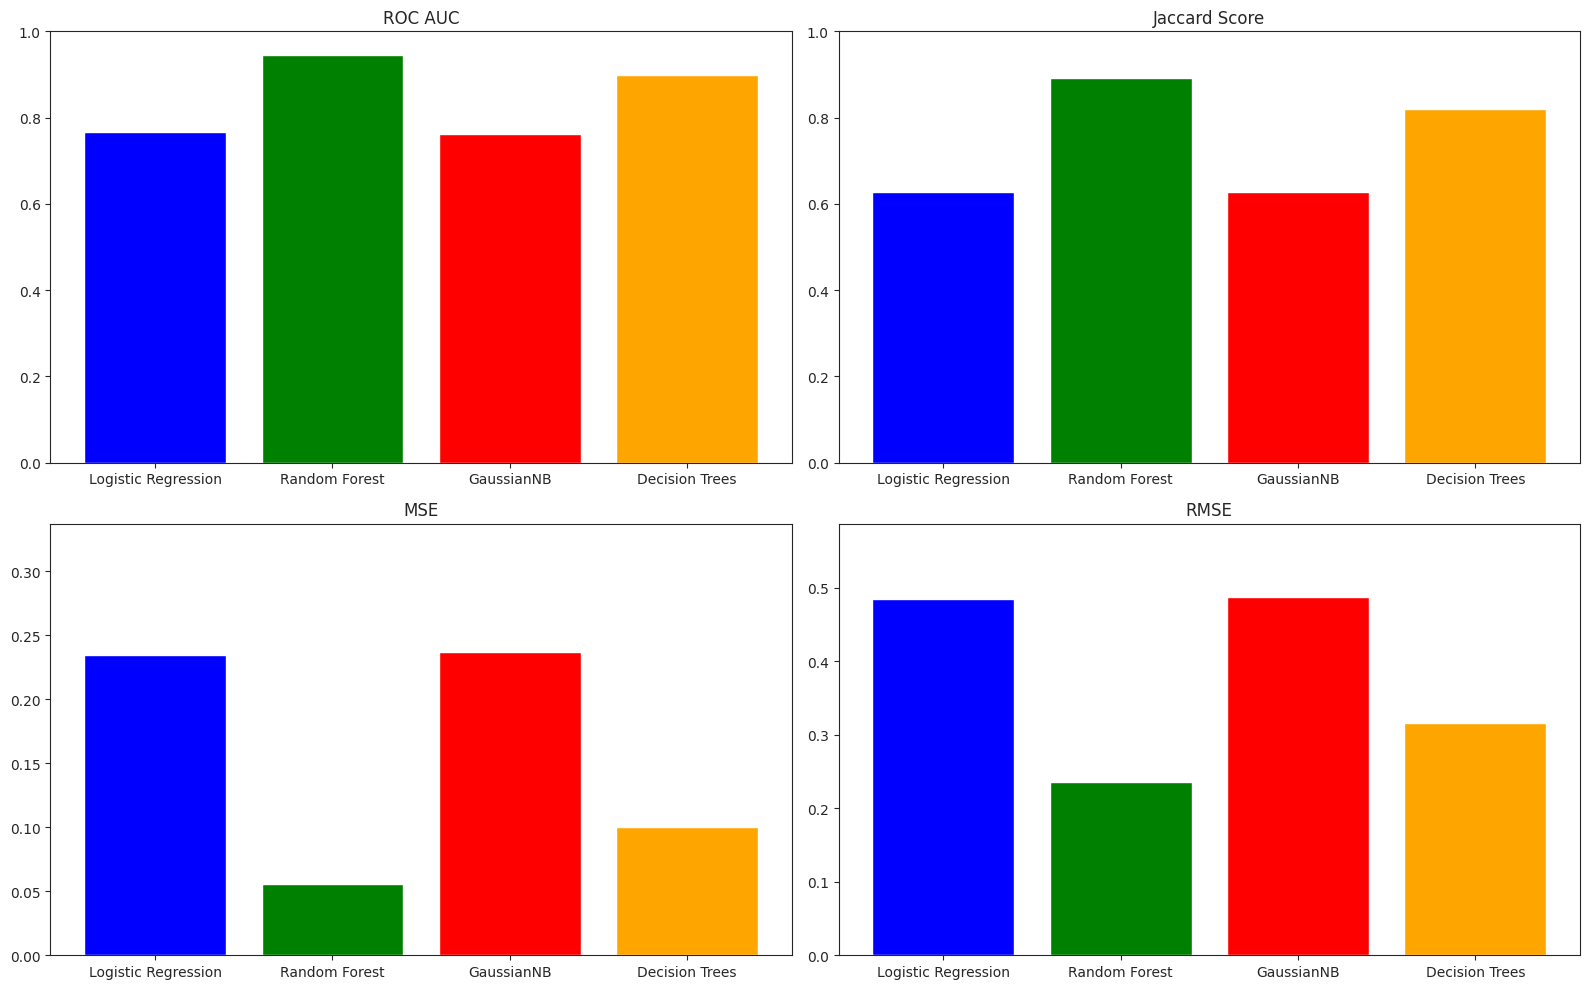

In [ ]:
import matplotlib.pyplot as plt

# Define the metrics and their values for each model
models = ['Logistic Regression', 'Random Forest', 'GaussianNB', 'Decision Trees']
roc_auc_values = [roc_auc_lr, roc_auc_rf, roc_auc_nb, roc_auc_dt]
jaccard_values = [jaccard_lr, jaccard_rf, jaccard_nb, jaccard_dt]
mse_values = [mse_lr, mse_rf, mse_nb, mse_dt]
rmse_values = [rmse_lr, rmse_rf, rmse_nb, rmse_dt]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# ROC AUC
axs[0, 0].bar(models, roc_auc_values, color=['blue', 'green', 'red', 'orange'])
axs[0, 0].set_title('ROC AUC')
axs[0, 0].set_ylim(0, 1)

# Jaccard Score
axs[0, 1].bar(models, jaccard_values, color=['blue', 'green', 'red', 'orange'])
axs[0, 1].set_title('Jaccard Score')
axs[0, 1].set_ylim(0, 1)

# MSE
axs[1, 0].bar(models, mse_values, color=['blue', 'green', 'red', 'orange'])
axs[1, 0].set_title('MSE')
axs[1, 0].set_ylim(0, max(mse_values) + 0.1)

# RMSE
axs[1, 1].bar(models, rmse_values, color=['blue', 'green', 'red', 'orange'])
axs[1, 1].set_title('RMSE')
axs[1, 1].set_ylim(0, max(rmse_values) + 0.1)

plt.tight_layout()
plt.show()


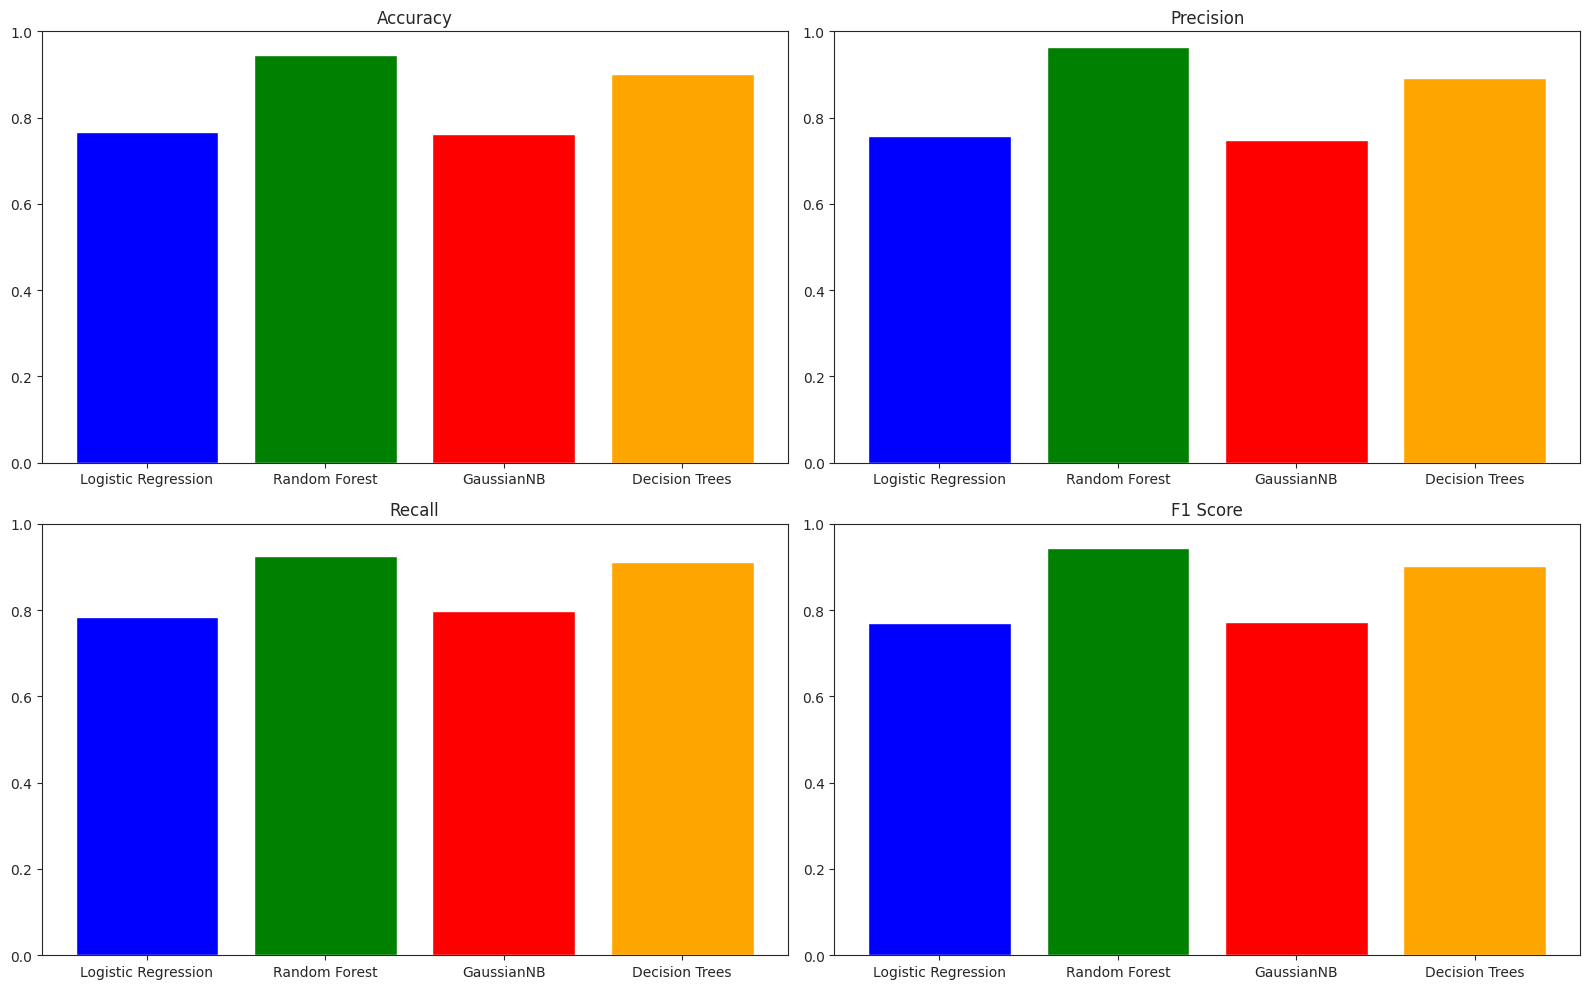

In [ ]:
import matplotlib.pyplot as plt

# Define the metrics and their values for each model
accuracy_values = [accuracy_lr, accuracy_rf, accuracy_nb, accuracy_dt]
precision_values = [precision_lr, precision_rf, precision_nb, precision_dt]
recall_values = [recall_lr, recall_rf, recall_nb, recall_dt]
f1_score_values = [f1_lr, f1_rf, f1_nb, f1_dt]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Accuracy
axs[0, 0].bar(models, accuracy_values, color=['blue', 'green', 'red', 'orange'])
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylim(0, 1)

# Precision
axs[0, 1].bar(models, precision_values, color=['blue', 'green', 'red', 'orange'])
axs[0, 1].set_title('Precision')
axs[0, 1].set_ylim(0, 1)

# Recall
axs[1, 0].bar(models, recall_values, color=['blue', 'green', 'red', 'orange'])
axs[1, 0].set_title('Recall')
axs[1, 0].set_ylim(0, 1)

# F1 Score
axs[1, 1].bar(models, f1_score_values, color=['blue', 'green', 'red', 'orange'])
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_ylim(0, 1)

plt.tight_layout()
plt.show()


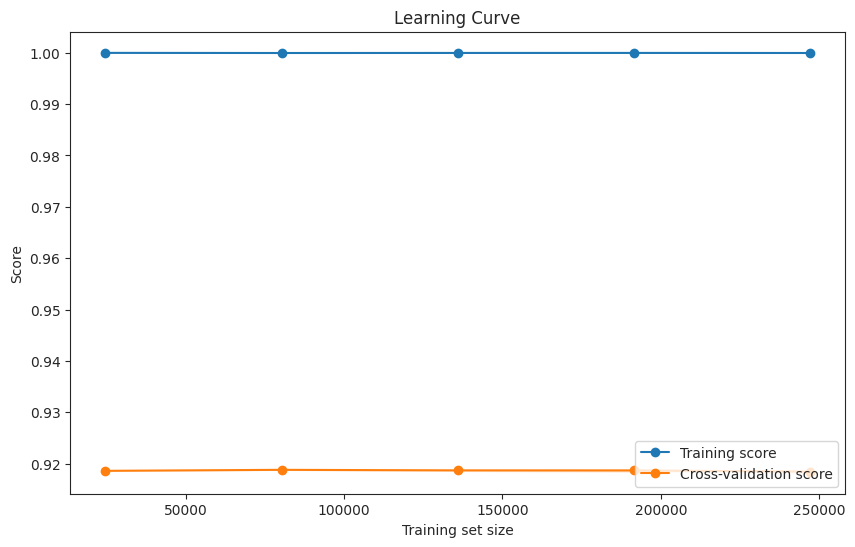

In [ ]:
from sklearn.model_selection import learning_curve

# Assuming you have a model named 'model'
model = RandomForestClassifier()

# Generate learning curve data
train_sizes, train_scores, valid_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score', marker='o')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='Cross-validation score', marker='o')
plt.fill_between(train_sizes, train_scores.mean(axis=1) - train_scores.std(axis=1),
                 train_scores.mean(axis=1) + train_scores.std(axis=1), alpha=0.2)
plt.fill_between(train_sizes, valid_scores.mean(axis=1) - valid_scores.std(axis=1),
                 valid_scores.mean(axis=1) + valid_scores.std(axis=1), alpha=0.2)
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


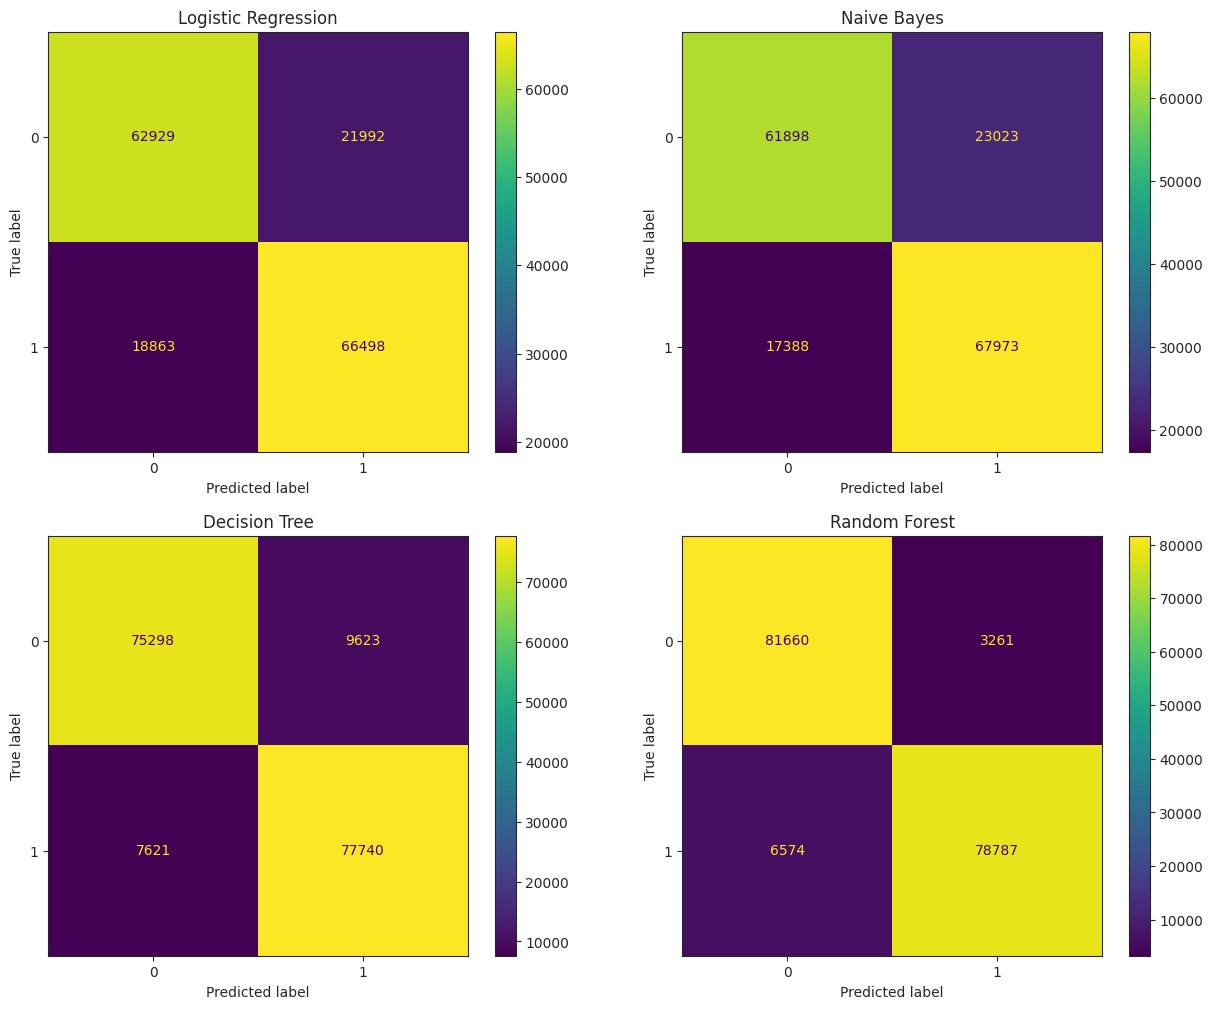

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have trained models named lr_model, nb_model, dt_model, and rf_model
lr_model = LogisticRegression()
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

# Train the models (replace with your actual training code)
lr_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Compute confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=lr_model.classes_)
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=nb_model.classes_)
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=dt_model.classes_)
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)

# Create ConfusionMatrixDisplay objects
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_model.classes_)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_model.classes_)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_model.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)

# Plot the confusion matrices
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

disp_lr.plot(ax=axs[0, 0])
axs[0, 0].set_title('Logistic Regression')

disp_nb.plot(ax=axs[0, 1])
axs[0, 1].set_title('Naive Bayes')

disp_dt.plot(ax=axs[1, 0])
axs[1, 0].set_title('Decision Tree')

disp_rf.plot(ax=axs[1, 1])
axs[1, 1].set_title('Random Forest')

plt.show()
